In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import psutil
import jdc
from tqdm import tqdm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)        

## Parameter

In [27]:
class r0733300:
    def __init__(self):
        self.LAMBDA = 100  # Lambda represents the size of population
        self.MU = 100 # Mu represents the size of offsprings
        self.distanceMatrix = []  # distanceMatrix saves the cost between each two places
        self.K_TOURNAMENT_SIZE = 3  # this is the size of selection
        self.K_TOURNAMENT_SIZE_elimination = 10  # this is the size of selection
        self.alpha = 0.05  # alpha is the mutation rate
        self.iteration = 0  # iteration number
        self.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
        self.rank = 50
        self.rank_list = []
        self.s = 0.99999
        self.lsp_size = 1
        self.selectiveIni = 50
        self.alphaDiversity = 0.2
        self.K_TOURNAMENT_Size_Diversify = 3
        self.K_TOURNAMENT_SIZE_elimination_Diversify = 3
        self.LAMBDA_Diversify = 100
        self.selective_Diversify = 50
        self.EliteNumber = 3

## Initialization
###  Random Initialization

In [28]:
class r0733300(r0733300):
    def initialize(self, matrix, lamda):
        print(random)
        initialization = []
        n = len(matrix)
        for i in range(0, lamda):  # generate population of LAMBDA
            candidate = np.random.permutation(n)
            candidate2 = np.ndarray.tolist(candidate)
            initialization.append([candidate2, self.calculate_distance(candidate2 ,self.distanceMatrix)])
            
        return initialization


### Selective Initialization

In [29]:
from typing import DefaultDict
import random
class r0733300(r0733300):
    def selectiveInialization(self, k):
        cost = 0
        cityNumber = len(self.distanceMatrix)
        route = [0] * cityNumber
        unvisited = np.arange(cityNumber)
        front = random.randrange(0, cityNumber)
        # front = 0
        route[0] = front
        unvisited = np.delete(unvisited, front)
        counter = 1
        while(len(unvisited) > 0):
            # print(len(unvisited))
            distance = self.distanceMatrix[front]
            distance = np.argsort(distance)
            candidates = distance[1:1+k]
            
            candidates_unvisited = []
            for i in candidates:
                if i in unvisited:
                    candidates_unvisited.append(i)


            if(len(candidates_unvisited) != 0):
                next = candidates_unvisited[random.randrange(0, len(candidates_unvisited))]
                route[counter] = next
                unvisited = np.delete(unvisited, np.where(unvisited == next))
                cost += self.distanceMatrix[front][next]
                front = next
                counter +=1
                # print('k')
            else:
                next = unvisited[random.randrange(0, len(unvisited))]
                route[counter] = next
                unvisited = np.delete(unvisited, np.where(unvisited == next))
                cost += self.distanceMatrix[front][next]
                front = next
                counter +=1
                # print('not K')

        cost += self.distanceMatrix[route[0]][route[-1]]
        # print(cost)
        # print(route)
        
        return [route,cost]

class r0733300(r0733300):
    def selectiveInializationBatch(self, k, lamda):
        parents = []
        for i in tqdm(range(0, lamda)):
        # for i in range(0, self.LAMBDA):
            # print(i) 
            parents.append(self.selectiveInialization(k))
        
        return parents

### Greedy Initialization

In [30]:
# Python3 program for the above approach

from typing import DefaultDict


INT_MAX = float("inf")	

# Function to find the minimum
# cost path for all the paths
class r0733300(r0733300):
	def findMinRoute(self, tsp,k):
		sum = 0
		counter = 0
		j = 0
		i = k
		min = INT_MAX
		min_city = 0
		visitedRouteList = DefaultDict(int)

		# Starting from the 0th indexed
		# city i.e., the first city
		visitedRouteList[i] = 1
		route = [0] * len(tsp)
		route[0] = i
		counter += 1

		# Traverse the adjacency
		# matrix tsp[][]
		while(True):

			# Corner of the Matrix
			if counter >= len(tsp[i])  :
				break

			# If this path is unvisited then
			# and if the cost is less then
			# update the cost
			if (j != i and (visitedRouteList[j] == 0)):
				if tsp[i][j] <= min:
					min = tsp[i][j]
					min_city = j

			j += 1

			# Check all paths from the
			# ith indexed city
			if j == len(tsp[i]):
				min = INT_MAX
				visitedRouteList[min_city] = 1
				route[counter] = min_city
				j = 0
				i = route[counter]
				counter += 1
				min_city=0
       
       
       


		# Update the ending city in array
		# from city which was last visited
		# i = route[counter - 1]

		# for j in range(len(tsp)):

		# 	if (i != j) and tsp[i][j] < min:
		# 		min = tsp[i][j]
		# 		route[counter] = j

		sum =0
		for i in range(len(route)-1):
			sum += tsp[route[i]][route[i+1]]
		sum += tsp[route[len(route)-1]][route[0]]

		# Started from the node where
		# we finished as well.
		# print("Minimum Cost is :", sum)
		# print(route)
		# print(np.sort(route))
		return [route,sum]

class r0733300(r0733300):
    def greedyInializationBatch(self, distanceMatrix, lamda):
        parents = []
        for i in tqdm(range(0, lamda)):
            # print(i) 
            k = random.randrange(0,len(distanceMatrix))
            parents.append(self.findMinRoute(distanceMatrix,k))
        
        return parents
	# # Driver Code
	# file = open("tour1000(1).csv")
	# tsp = np.loadtxt(file, delimiter=",")
	# findMinRoute(tsp,20)


## Calculate Distance

In [31]:
class r0733300(r0733300):
        def calculate_distance(self, permutation, distanceMatrix):
            # print(permutation_mu[0])
            total = 0
            length = len(permutation) - 1

            index_last = permutation[length]
            index_ini = permutation[0]
            # print(index_last)
            # print(index_ini)
            total += self.distanceMatrix[index_last][index_ini]

            for i in range(0, length):
                index1 = permutation[i]
                index2 = permutation[i + 1]
                # print(self.distanceMatrix[index1][index2])
                if distanceMatrix[index1][index2] == float('inf'):
                    total += 1000000000
                    # break
                else:
                    total += self.distanceMatrix[index1][index2]
            return total

## Selection

In [32]:
class r0733300(r0733300):
    def k_tournament_selection(self, solutions, k):  # select K_TOURNAMENT random and select the best within
        random_list = random.sample(range(0,len(solutions)),k)
        # print(random_list)
        best = solutions[random_list[0]]

        for i in random_list:
            if solutions[i][1]< best[1]:
                best = solutions[i]
        return best
    
    def calculate_rank_list(self,iteration ):
        self.rank_list = []
        if(self.s >=1.551282966377186e-220):
            self.s = self.s ** 2    
        # a =  (1-self.s)/((1-self.rank)**2)
        a =  math.log(self.s)/(self.rank-1)
        # print(a)
        q_list = []
        for i in range(1,self.rank+1):
            # q = a* ((i-self.rank)**2) + self.s
            q =  math.exp(a * (i-1))
            q_list.append(q)

        rank_sum = sum(q_list)

        for i in range(1,self.rank+1):
            self.rank_list.append(sum(q_list[:i])/rank_sum)
    
        # print(self.rank_list)
        return 0
    
    def ranking_selection(self,solutions, fitnesses):

        popu_fit = zip(fitnesses,solutions)
        popu_fit_sorted = sorted(popu_fit)
        sort_popu = [element for _, element in popu_fit_sorted]

        a= np.random.random()
        for i in range(self.rank):
            if(a<self.rank_list[i]):
                return sort_popu[i]
    
    
    

## Mutation

In [33]:
class r0733300(r0733300):
    def mutation_swap(self, individual, alpha):
        permutation = individual[0]

        length = len(permutation)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        if (np.random.random() < alpha):
            temp = permutation[index1]
            permutation[index1] = permutation[index2]
            permutation[index2] = temp

        return [permutation, self.calculate_distance(permutation, self.distanceMatrix)]

    def mutation_insert(self, individual, alpha):
        permutation = individual[0]
        length = len(permutation)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        if (np.random.random() < alpha):
            later = permutation[index2]
            permutation.pop(index2)
            permutation.insert(index1,later)

        return [permutation, self.calculate_distance(permutation, self.distanceMatrix)]

    
    def mutation_scramble(self, permutation_mu):
        permutation = permutation_mu

        permutation_new = permutation
        length = len(permutation)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = index1 +5
        if (np.random.random() < permutation_mu[1]):
            begin = permutation[0:index1]
            middle = permutation[index1:index2]
            end = permutation[index2:]
            random.shuffle(middle)
            permutation_new = begin+middle+end
        

        return permutation_new

## Recombination

In [34]:
class r0733300(r0733300):
    #order crossover
    def orderCrossover(self, individual1, individual2):
        permutation1 = individual1[0]
        permutation2 = individual2[0]
        
        length = len(permutation2)
        # print("length1 " + str(len(permutation1)))
        # print("length2 " + str(len(permutation2)))
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        offspring = permutation1[index1:index2+1]
        for i in range(length):
            newcity = permutation2[i]
            if(newcity not in offspring):
                offspring.append(newcity)
                
        # if(len(offspring) == 99):
        #     print(np.sort(permutation1))
        #     print(np.sort(permutation2))
        # print("offspring " + str(len(offspring)))
        return [offspring, self.calculate_distance(offspring, self.distanceMatrix)]
   
    def recominbation_crossover(self, individual1, individual2):
        permutation1 = individual1[0]
        permutation2 = individual2[0]

        length = len(permutation1)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)
        # index1 = 0
        # index2 = int(length/2)

        offspring = []
        not_yet_used = []
        for i in range(0, length):
            offspring.append(-1)
        for i in range(index1, index2 + 1):
            offspring[i] = permutation1[i]
        for i in range(index2 + 1, length):
            if permutation2[i] in offspring:
                continue
            else:
                not_yet_used.append(permutation2[i])
        for i in range(0, index2 + 1):
            if permutation2[i] in offspring:
                continue
            else:
                not_yet_used.append(permutation2[i])
        j = 0
        for i in range(index2 + 1, length):
            offspring[i] = not_yet_used[j]
            j += 1
        for i in range(0, index1):
            offspring[i] = not_yet_used[j]
            j += 1


        # beta = random.random()/10
        # alpha = max(0,permutation_mu1[1] + beta* (permutation_mu1[1]-permutation_mu2[1]))
        # print(alpha)
        # print(alpha)

        return [offspring, self.calculate_distance(offspring, self.distanceMatrix)]
        # return [offspring, 0]

    def pmx_crossover(self,permutation1, permutation2):
        length = len(permutation1)
        random_list = random.sample(range(0, length -1),2)
        index1 = np.min(random_list)
        index2 = np.max(random_list)

        # print(index1,index2)

        parent1_middle = permutation1[index1:index2]
        parent2_middle = permutation2[index1:index2]

        temp_child1 = permutation1[:index1] + parent2_middle + permutation1[index2:]
        temp_child2 = permutation2[:index1] + parent1_middle + permutation2[index2:]
        # print(temp_child2)
        relations = []
        for i in range(len(parent1_middle)):
            relations.append([parent2_middle[i], parent1_middle[i]])

        # print(relations)

        child1 = self.recursion1(temp_child1, index1, index2,parent1_middle,parent2_middle,relations)
        child2 = self.recursion2(temp_child2, index1, index2,parent1_middle,parent2_middle,relations)

        child1 = np.ndarray.tolist(child1)
        child2 = np.ndarray.tolist(child2)

        
        # print(child1)
        # print(child2)
        
        return child1, child2

    def recursion1(self,temp_child1, index1, index2,parent1_middle,parent2_middle,relations):
        child = np.array([0 for i in range(len(temp_child1))])
        for i,j in enumerate(temp_child1[:index1]):
            c=0
            for x in relations:
                if j == x[0]:
                    child[i]=x[1]
                    c=1
                    break
            if c==0:
                child[i]=j
        j=0
        for i in range(index1,index2):
            child[i]=parent2_middle[j]
            j+=1

        for i,j in enumerate(temp_child1[index2:]):
            c=0
            for x in relations:
                if j == x[0]:
                    child[i+index2]=x[1]
                    c=1
                    break
            if c==0:
                child[i+index2]=j
        child_unique=np.unique(child)
        if len(child)>len(child_unique):
            child=self.recursion1(child, index1, index2,parent1_middle,parent2_middle,relations)
        return(child)

    def recursion2(self, temp_child2, index1, index2,parent1_middle,parent2_middle,relations):
        child = np.array([0 for i in range(len(temp_child2))])
        for i,j in enumerate(temp_child2[:index1]):
            c=0
            for x in relations:
                if j == x[1]:
                    child[i]=x[0]
                    c=1
                    break
            if c==0:
                child[i]=j
        j=0
        for i in range(index1,index2):
            child[i]=parent1_middle[j]
            j+=1

        for i,j in enumerate(temp_child2[index2:]):
            c=0
            for x in relations:
                if j == x[1]:
                    child[i+index2]=x[0]
                    c=1
                    break
            if c==0:
                child[i+index2]=j
        child_unique=np.unique(child)
        # print(child)
        if len(child)>len(child_unique):
            child=self.recursion2(child, index1, index2,parent1_middle,parent2_middle,relations)
        return(child)

    # def eliminate(self, solutions1, offspring,fitnesses):
    #     return sorted(solutions1 + offspring, key=lambda permutation: self.calculate_distance(permutation))[
    #             :self.LAMBDA]

## Elimination

In [35]:
class r0733300(r0733300):
    def eliminate_lamda_mu(self, population):

        objectives = []
        for individual in population:
            objectives.append(self.calculate_distance(individual))

        popu_fit = zip(objectives,population)
        popu_fit_sorted = sorted(popu_fit)
        sort_popu = [element for _, element in popu_fit_sorted]

        return sort_popu[0:self.land_size], objectives[0:self.land_size]

    def eliminate_k_turnament(self, population,k):
        population_new = []
        # fitnesses_new = []


        # objectives = []
        # for individual in population:
        #     objectives.append(self.calculate_distance(individual))

        # # objectives_weight = objectives.copy()

        length = len(population)
        for i in range(self.LAMBDA):
            random_list = random.sample(range(0, length),k)
            best = population[random_list[0]]
            
            for j in random_list:
                if (population[j][1] < best[1]):
                    best = population[j]

            population_new.append(best)
            
        
        return population_new

## LSP

In [36]:
class r0733300(r0733300):
    def lsp_2_opt(self, permutation):

        best_fitness = self.calculate_distance(permutation)
        best_permutation = permutation

        # print('ini' + str(permutation))
        # print(best_fitness)
        length = len(permutation)
        for i in range(length-3):
            for j in range(i+2, length-1):
                copy1 = permutation.copy()
                # print('copy1' + str(permutation))
                a = permutation[i]
                b = permutation[i+1]
                c = permutation[j]
                d = permutation[j+1]

                a_copy = a
                b_copy = b

                copy1[i] = c
                copy1[i+1] = d
                copy1[j] = a_copy
                copy1[j+1] = b_copy

                

                copy_fitness = self.calculate_distance(copy1)
                if(copy_fitness<best_fitness):
                    best_fitness = copy_fitness
                    best_permutation = copy1

                    # print('modified    ' + str(best_permutation))
                    # print(best_fitness)


        # print('mod' + str(best_permutation))
        # print(best_fitness)
        return best_permutation


    def lsp_2_opt_symmetry(self, permutation):

        best_fitness = self.calculate_distance(permutation)
        best_permutation = permutation

        # print('ini' + str(permutation))
        # print(best_fitness)
        length = len(permutation)
        for i in range(int(length/2)-1):
            copy1 = permutation.copy()
            # print('copy1' + str(permutation))
            a = permutation[i]
            b = permutation[i+1]
            c = permutation[length -i-2]
            d = permutation[length -i -1]

            a_copy = a
            b_copy = b

            copy1[i] = c
            copy1[i+1] = d
            copy1[length -i-2] = a_copy
            copy1[length-i - 1] = b_copy

            

            copy_fitness = self.calculate_distance(copy1)
            if(copy_fitness<best_fitness):
                best_fitness = copy_fitness
                best_permutation = copy1

                # print('modified    ' + str(best_permutation))
                # print(best_fitness)


        # print('mod' + str(best_permutation))
        # print(best_fitness)
        return best_permutation

## Plot

In [37]:
class r0733300(r0733300):
    def plotFitness(self, meanfitnesses, bestfitnesses):
        plt.figure()
        plt.plot(range(len(meanfitnesses)), meanfitnesses)
        plt.plot(range(len(meanfitnesses)), bestfitnesses)
        plt.legend(['Mean Fitness','Best Fitness'],loc = 'upper left')
        plt.show()

## Diversify

### Diversity Matrix

In [38]:
class r0733300(r0733300):
    def calculateDiveristy(self, population):
        P = len(population)
        L = len(population[0][0])
        # print(P)
        # print(L)
        permutations = np.asarray(population)[:,0]
        # average = np.mean(permutations,axis=0)
        permutationsArray = []
        for i in permutations:
            permutationsArray.append(np.array(i))
        
        adjacencyMatrix = np.zeros((L,L))
        for i in permutationsArray:
            for j in range(L-1):
                adjacencyMatrix[i[j]][i[j+1]] += 1
            adjacencyMatrix[i[L-1]][i[0]] +=1
        
        # print(adjacencyMatrix)
        
        # print(np.shape(permutationsArray))
        # average = np.mean(permutationsArray, axis=0)
        # print(average)
        variance = np.std(adjacencyMatrix, axis= 0)
        # variance = np.var(adjacencyMatrix, axis= 0)
        # print(np.shape(variance))
        return sum(variance)/(L*P)
    
    
        
        

# algo = r0733300();
# algo.LAMBDA = 100
# file = open("tour100(1).csv")
# algo.K_TOURNAMENT_SIZE = 3
# algo.K_TOURNAMENT_SIZE_elimination = 3
# algo.alpha = 0.5
# distanceMatrix = np.loadtxt(file, delimiter=",")
# algo.distanceMatrix = distanceMatrix
# pop1 = algo.initialize(distanceMatrix)
# print(algo.calculateDiveristy(pop1))
# randomDiversity = algo.calculateDiveristy(pop1)
# pop2 = algo.selectiveInializationBatch(10)
# print(algo.calculateDiveristy(pop2))
# selectiveDiversity = algo.calculateDiveristy(pop2)
# while(selectiveDiversity >= 2 * randomDiversity):
#     newPopulation = algo.selectiveInializationBatch(20)
#     pop2 += newPopulation
#     newOffsprings = []
#     for i in tqdm(range(algo.MU)):
#     # for i in range(self.MU):
#         p1 = algo.k_tournament_selection(pop2)
#         p2 = algo.k_tournament_selection(pop2)
        
#         offspring1 = algo.orderCrossover(p1, p2)
#         offspring2 = algo.orderCrossover(p2, p1)

#         offspring1 = algo.mutation_swap(offspring1)
#         offspring2 = algo.mutation_swap(offspring2)

#         offspring1 = algo.mutation_insert(offspring1)
#         offspring2 = algo.mutation_insert(offspring2)

#         newOffsprings.append(offspring1)
#         newOffsprings.append(offspring2)
    
#     pop2 += newOffsprings
#     pop2= algo.eliminate_k_turnament(pop2)
#     selectiveDiversity = algo.calculateDiveristy(pop2)
#     print(selectiveDiversity)
    


In [39]:
algo = r0733300();
file = open("tour100(1).csv")
distanceMatrix = np.loadtxt(file, delimiter=",")
algo.distanceMatrix = distanceMatrix
# pop = algo.selectiveInializationBatch(5)
# pop2 = algo.initialize(distanceMatrix)
pop3 = algo.greedyInializationBatch(distanceMatrix, algo.LAMBDA)

# print(np.shape(pop3[0][0]))
# algo.orderCrossover(pop2[0], pop2[1])
# algo.calculateDiveristy(pop)

100%|██████████| 100/100 [00:00<00:00, 160.32it/s]


### Diversify Elimination

In [40]:
# class r0733300(r0733300):
#     def elimination_diversify(self, diversityAverge, population, lamba):
        
        

### DiversifyArchive Generation


In [41]:
class r0733300(r0733300):
    def archiveGeneration(self, k, threshold, size, archiveSize):
        # archive = []
        randomInitialization = self.initialize(self.distanceMatrix, size)
        randomDiversity = self.calculateDiveristy(randomInitialization)
        
        candidates = self.selectiveInializationBatch(k,size)
        # candidates = self.initialize(self.distanceMatrix, size)
        # candidates = self.greedyInializationBatch(self.distanceMatrix, size)
        
        P = len(candidates)
        L = len(candidates[0][0])
        permutations = np.asarray(candidates)[:,0]
        # average = np.mean(permutations,axis=0)
        permutationsArray = []
        for i in permutations:
            permutationsArray.append(np.array(i))
        
        adjacencyMatrix = np.zeros((L,L))

        for i in permutationsArray:
            for j in range(L-1):
                adjacencyMatrix[i[j]][i[j+1]] += 1
            adjacencyMatrix[i[L-1]][i[0]] +=1
        # print(np.shape(adjacencyMatrix))
        # print(adjacencyMatrix[:,0])
        meanAdjacency = []
        for i in range(L):
            meanAdjacency.append(np.average(range(L), weights = adjacencyMatrix[i,:]))

        print(meanAdjacency)
        
        AdjacencyRoute = np.zeros((P,L))
        for i in range(P):
            for j in range(L-1):
                AdjacencyRoute[i][permutationsArray[i][j]] = permutationsArray[i][j+1]
            AdjacencyRoute[i][permutationsArray[i][-1]] = permutationsArray[i][0]
        print(permutationsArray[0])
        print(AdjacencyRoute[0])
        
        diversifyList = []
        for i in AdjacencyRoute:
            diver = np.sum(np.std(meanAdjacency  + i, axis = 0))
            diversifyList.append(diver)
        
        # print(diversifyList)
        # print(np.argsort(diversifyList))
        # print(np.argsort((diversifyList))[-11:-1])
        archiveIndex = np.argsort((diversifyList))[-1-archiveSize:-1]
        archive = np.array(permutationsArray)[archiveIndex]
        archiveWithDistance = []
        for i in range(len(archive)):
            # print(self.calculate_distance(i,self.distanceMatrix))
            archiveWithDistance.append([archive[i], self.calculate_distance(archive[i],self.distanceMatrix)])
        # print(archiveWithDistance[0])
        # archive = permutationsArray[]
        # print(len(archive))
        print(self.calculateDiveristy(archiveWithDistance))


# algo = r0733300();
# file = open("tour29(1).csv")
# distanceMatrix = np.loadtxt(file, delimiter=",")
# algo.distanceMatrix = distanceMatrix
# algo.archiveGeneration(20,0.5,200,50)



In [42]:
algo = r0733300();
file = open("tour29(1).csv")
distanceMatrix = np.loadtxt(file, delimiter=",")
algo.distanceMatrix = distanceMatrix
pop = algo.selectiveInializationBatch(20,50)
# print(algo.calculateDiveristy(pop))

100%|██████████| 50/50 [00:00<00:00, 294.96it/s]


In [43]:
popSort = np.argsort(pop,axis = 0 )[:,1]
elites = np.array(pop)[popSort][:3]
elitesNotChosen = []
for i in elites:
    if(i.tolist() in pop):
        elitesNotChosen.append(i.tolist())
pop += elitesNotChosen


In [44]:
elites[-1]

array([list([4, 0, 23, 22, 7, 27, 14, 10, 26, 25, 6, 12, 19, 16, 8, 18, 1, 20, 17, 11, 21, 28, 13, 3, 5, 15, 2, 9, 24]),
       405782.30000000005], dtype=object)

In [45]:
pop[0]

[[12,
  21,
  17,
  4,
  19,
  28,
  11,
  6,
  27,
  23,
  13,
  7,
  5,
  15,
  2,
  18,
  14,
  0,
  8,
  10,
  25,
  20,
  26,
  22,
  1,
  16,
  3,
  24,
  9],
 486615.67000000004]

## Elitism

### Elitism Main Loop

In [46]:
class r0733300(r0733300):
    def optimizeElitism(self, filename, initializaMethod):
        # Read distance matrix from file.
        file = open(filename)
        distanceMatrix = np.loadtxt(file, delimiter=",")
        self.distanceMatrix = distanceMatrix
        file.close()
        if(initializaMethod == 0):
            population = self.initialize(self.distanceMatrix, self.LAMBDA)
        elif(initializaMethod == 1):
            population  = self.selectiveInializationBatch(self.selectiveIni, self.LAMBDA) 
        elif (initializaMethod ==2):
            population = self.greedyInializationBatch(self.distanceMatrix, self.LAMBDA)

        population += self.greedyInializationBatch(self.distanceMatrix, 10)

        meanFitnesses = []
        bestFitnesses = []

        meanObjective = np.mean(np.asarray(population)[:,1])
        bestObjective = np.min(population,axis=0)[1]
        initialDiversity = self.calculateDiveristy(population)

        meanFitnesses.append((meanObjective))
        bestFitnesses.append(bestObjective)

        print(" Inital Mean Objectives : " + str(meanObjective))
        print(" Inital Best Objectives : " + str(bestObjective))
        print(" diversity         : " + str(self.calculateDiveristy(population)))
        
        start = time.time()
        while (time.time()-start <= 300):
            self.iteration += 1

            newOffsprings = []

            popSort = np.argsort(population,axis = 0 )[:,1]
            elites = np.array(population)[popSort][:4]

            for i in tqdm(range(self.EliteNumber)):
                p1 = elites[i]
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                offspring1 = self.orderCrossover(p1, p2)
                offspring2 = self.orderCrossover(p2, p1)

                offspring1 = self.mutation_swap(offspring1, self.alpha)
                offspring2 = self.mutation_swap(offspring2, self.alpha)

                offspring1 = self.mutation_insert(offspring1, self.alpha)
                offspring2 = self.mutation_insert(offspring2, self.alpha)

                newOffsprings.append(offspring1)
                newOffsprings.append(offspring2)

            
            for i in tqdm(range(self.MU)):
            # for i in range(self.MU):
                p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_SIZE)
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                # p1 = population[0]
                # p2 = population[1]
                while(True ): 
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)
                    # offspring1 = self.recominbation_crossover(p1,p2)
                    # offspring2 = self.recominbation_crossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alpha)
                    offspring2 = self.mutation_swap(offspring2, self.alpha)

                    offspring1 = self.mutation_insert(offspring1, self.alpha)
                    offspring2 = self.mutation_insert(offspring2, self.alpha)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                    
                    if(offspring1[1] < min(p1[1], p2[1]) or offspring2[1] <= min(p1[1], p2[1]) or random.random() < self.alpha):
                        break
                
            # for i in population:
            #     i = self.mutation_swap(i, self.alpha)
            #     i = self.mutation_insert(i, self.alpha)


            population += newOffsprings
            population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination)
            
            # add elites to population
            elitesNotChosen = []
            for i in elites:
                # print(i)
                if i.tolist() not in population:
                    # print("elites chosen")
                    elitesNotChosen.append(i.tolist())
            population += elitesNotChosen

            print(np.shape(population))

        
            meanObjective = np.mean(np.asarray(population)[:,1])
            bestObjective = np.min(population,axis=0)[1]
            # bestSolution = population[np.argmin(objectives)]

            meanFitnesses.append((meanObjective))
            bestFitnesses.append(bestObjective)

            diversify = self.calculateDiveristy(population)
            
            print(self.iteration)
            print(" Mean Objectives : " + str(meanObjective))
            print(" Best Objectives : " + str(bestObjective))
            print(" diversity         : " + str(self.calculateDiveristy(population)))
            print("Time: " + str(time.time()-start))
            
            if(diversify >= 3* initialDiversity):
                print("  start diversifying")
            while(diversify >= 3 * initialDiversity):
                newPopulation = self.selectiveInializationBatch(self.selective_Diversify, self.LAMBDA_Diversify)
                newPopulation += self.initialize(self.distanceMatrix,self.LAMBDA_Diversify)
                # print("new Population" + str(self.calculateDiveristy(newPopulation)))
                
                # population += newPopulation
                newOffsprings = []
                
                for i in tqdm(range(self.MU)):
                    p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_Size_Diversify)
                    p2 = self.k_tournament_selection(newPopulation, self.K_TOURNAMENT_Size_Diversify)
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_swap(offspring2, self.alphaDiversity)

                    offspring1 = self.mutation_insert(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_insert(offspring2, self.alphaDiversity)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                
                population += newOffsprings
                # print("population size " + str(len(population)))
                population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination_Diversify)
                # print("population size " + str(len(population)))
                diversify = self.calculateDiveristy(population)
                print("New diverisity:    " + str(diversify))


        self.plotFitness(meanFitnesses, bestFitnesses)

### Elitism Process

100%|██████████| 10/10 [00:00<00:00, 1591.89it/s]


 Inital Mean Objectives : 56005.71048845004
 Inital Best Objectives : 30786.287230082078
 diversity         : 0.04734366490183867


100%|██████████| 200/200 [00:00<00:00, 267.35it/s]


(200, 2)
1
 Mean Objectives : 32223.070557764782
 Best Objectives : 29625.24241290765
 diversity         : 0.137045749741396
Time: 0.7702755928039551


100%|██████████| 200/200 [00:00<00:00, 256.41it/s]


(200, 2)
2
 Mean Objectives : 30076.654832844284
 Best Objectives : 28995.235353721142
 diversity         : 0.15456645838239305
Time: 1.5739994049072266
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 560.33it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1379.11it/s]


New diverisity:    0.12553335435674443


100%|██████████| 200/200 [00:00<00:00, 292.31it/s]


(200, 2)
3
 Mean Objectives : 29387.96471441802
 Best Objectives : 28778.560777468996
 diversity         : 0.16120819471066594
Time: 2.9839351177215576
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 521.79it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2631.05it/s]


New diverisity:    0.13246082548908428


100%|██████████| 200/200 [00:00<00:00, 235.59it/s]


(200, 2)
4
 Mean Objectives : 29030.672409776365
 Best Objectives : 28778.560777468996
 diversity         : 0.17153273363335636
Time: 4.532723665237427
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 580.33it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1804.94it/s]


New diverisity:    0.13992724052666247


100%|██████████| 200/200 [00:00<00:00, 359.17it/s]


(200, 2)
5
 Mean Objectives : 29206.430616825364
 Best Objectives : 28778.560777468996
 diversity         : 0.1769757350210088
Time: 5.767865180969238
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 511.54it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2204.11it/s]


New diverisity:    0.14212960171568045


100%|██████████| 300/300 [00:00<00:00, 586.10it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2496.87it/s]


New diverisity:    0.1251170721892732


100%|██████████| 200/200 [00:00<00:00, 353.67it/s]


(200, 2)
6
 Mean Objectives : 29356.570262178037
 Best Objectives : 28764.35577325832
 diversity         : 0.17388048435186707
Time: 7.669944763183594
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 579.75it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2751.27it/s]


New diverisity:    0.13249852430600706


100%|██████████| 200/200 [00:00<00:00, 375.55it/s]


(200, 2)
7
 Mean Objectives : 28883.5996039035
 Best Objectives : 28764.35577325832
 diversity         : 0.18069317035434468
Time: 8.836947202682495
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 607.68it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2834.03it/s]


New diverisity:    0.14112962287624575


100%|██████████| 200/200 [00:00<00:00, 255.17it/s]


(200, 2)
8
 Mean Objectives : 28868.518659565827
 Best Objectives : 28764.35577325832
 diversity         : 0.18178310346177348
Time: 10.226720094680786
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 574.17it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2719.06it/s]


New diverisity:    0.143881827500135


100%|██████████| 300/300 [00:00<00:00, 577.80it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2642.77it/s]


New diverisity:    0.12306970451726314


100%|██████████| 200/200 [00:00<00:00, 279.97it/s]


(200, 2)
9
 Mean Objectives : 29395.202441839123
 Best Objectives : 28764.35577325832
 diversity         : 0.17766491377764934
Time: 12.201415300369263
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 548.54it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2835.94it/s]


New diverisity:    0.140096263473804


100%|██████████| 200/200 [00:00<00:00, 337.92it/s]


(200, 2)
10
 Mean Objectives : 29169.131129922032
 Best Objectives : 28457.95861986554
 diversity         : 0.1793944187265534
Time: 13.472095489501953
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 649.50it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2618.28it/s]


New diverisity:    0.14635967301012542


100%|██████████| 300/300 [00:00<00:00, 579.96it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2742.32it/s]


New diverisity:    0.1255818075730931


100%|██████████| 200/200 [00:00<00:00, 245.18it/s]


(200, 2)
11
 Mean Objectives : 29258.662481908876
 Best Objectives : 28457.95861986554
 diversity         : 0.17314867492125882
Time: 15.485973119735718
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 535.71it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2805.49it/s]


New diverisity:    0.141907202177477


100%|██████████| 200/200 [00:00<00:00, 346.13it/s]


(200, 2)
12
 Mean Objectives : 28813.734436845905
 Best Objectives : 28457.95861986554
 diversity         : 0.17892366106672727
Time: 16.743412971496582
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 518.75it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2656.82it/s]


New diverisity:    0.13984128824233102


100%|██████████| 200/200 [00:00<00:00, 310.43it/s]


(200, 2)
13
 Mean Objectives : 28929.7744107577
 Best Objectives : 28457.95861986554
 diversity         : 0.1794619531583041
Time: 18.088778734207153
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 665.24it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2597.48it/s]


New diverisity:    0.14004505315854712


100%|██████████| 200/200 [00:00<00:00, 342.53it/s]


(200, 2)
14
 Mean Objectives : 28955.79782891694
 Best Objectives : 28457.95861986554
 diversity         : 0.17898406432422634
Time: 19.243612051010132
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 536.13it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2844.80it/s]


New diverisity:    0.1466325879273638


100%|██████████| 300/300 [00:00<00:00, 672.61it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2834.89it/s]


New diverisity:    0.126443058680481


100%|██████████| 200/200 [00:00<00:00, 401.16it/s]


(200, 2)
15
 Mean Objectives : 28934.060823979056
 Best Objectives : 28457.95861986554
 diversity         : 0.1795589476573633
Time: 20.95383930206299
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 654.95it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2377.46it/s]


New diverisity:    0.14336886811705934


100%|██████████| 300/300 [00:00<00:00, 624.32it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2728.60it/s]


New diverisity:    0.12559435801777907


100%|██████████| 200/200 [00:00<00:00, 325.38it/s]


(200, 2)
16
 Mean Objectives : 28976.896386636858
 Best Objectives : 28457.95861986554
 diversity         : 0.17914077881353077
Time: 22.73882818222046
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 542.28it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2636.00it/s]


New diverisity:    0.14041762937905508


100%|██████████| 200/200 [00:00<00:00, 356.04it/s]


(200, 2)
17
 Mean Objectives : 28938.40353881267
 Best Objectives : 28457.95861986554
 diversity         : 0.17920073590519164
Time: 23.97460699081421
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 518.78it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2672.48it/s]


New diverisity:    0.14348467086162794


100%|██████████| 300/300 [00:00<00:00, 508.14it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2571.35it/s]


New diverisity:    0.12513871698770668


100%|██████████| 200/200 [00:00<00:00, 306.46it/s]


(200, 2)
18
 Mean Objectives : 29140.73375684421
 Best Objectives : 28457.95861986554
 diversity         : 0.17821399004847965
Time: 26.020404815673828
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 521.59it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2589.58it/s]


New diverisity:    0.14701298278073727


100%|██████████| 300/300 [00:00<00:00, 537.81it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2709.66it/s]


New diverisity:    0.1284739155024091


100%|██████████| 200/200 [00:00<00:00, 329.52it/s]


(200, 2)
19
 Mean Objectives : 29076.716615882076
 Best Objectives : 28457.95861986554
 diversity         : 0.1784168588718526
Time: 27.98011016845703
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 589.84it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2392.18it/s]


New diverisity:    0.14656357224234803


100%|██████████| 300/300 [00:00<00:00, 536.94it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2694.37it/s]


New diverisity:    0.1297014422195872


100%|██████████| 200/200 [00:00<00:00, 333.87it/s]


(200, 2)
20
 Mean Objectives : 28983.691784176277
 Best Objectives : 28457.95861986554
 diversity         : 0.17872064837395582
Time: 29.873628616333008
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 661.64it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2818.98it/s]


New diverisity:    0.14360381998387675


100%|██████████| 300/300 [00:00<00:00, 584.94it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2781.23it/s]


New diverisity:    0.13312103823735516


100%|██████████| 200/200 [00:00<00:00, 335.39it/s]


(200, 2)
21
 Mean Objectives : 28990.779882433628
 Best Objectives : 28457.95861986554
 diversity         : 0.17907171981468306
Time: 31.645427465438843
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 524.44it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2797.70it/s]


New diverisity:    0.14199491541845508


100%|██████████| 200/200 [00:00<00:00, 310.38it/s]


(200, 2)
22
 Mean Objectives : 29005.20519856972
 Best Objectives : 28457.95861986554
 diversity         : 0.17857078771541712
Time: 32.98016595840454
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 494.90it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2804.11it/s]


New diverisity:    0.13856787983162633


100%|██████████| 200/200 [00:00<00:00, 341.29it/s]


(200, 2)
23
 Mean Objectives : 28980.446712500816
 Best Objectives : 28457.95861986554
 diversity         : 0.1788218061339385
Time: 34.289682149887085
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 536.06it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2108.17it/s]


New diverisity:    0.14089289257560073


100%|██████████| 200/200 [00:00<00:00, 282.57it/s]


(200, 2)
24
 Mean Objectives : 29079.076057472837
 Best Objectives : 28457.95861986554
 diversity         : 0.17856053165489777
Time: 35.702600717544556
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 536.97it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2706.59it/s]


New diverisity:    0.13797270276336968


100%|██████████| 200/200 [00:00<00:00, 347.90it/s]


(200, 2)
25
 Mean Objectives : 28793.46458339733
 Best Objectives : 28457.95861986554
 diversity         : 0.17991268881559652
Time: 36.954349994659424
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 518.53it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2642.85it/s]


New diverisity:    0.14272592794877045


100%|██████████| 300/300 [00:00<00:00, 597.50it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2569.52it/s]


New diverisity:    0.1275256560224939


100%|██████████| 200/200 [00:00<00:00, 288.06it/s]


(200, 2)
26
 Mean Objectives : 29109.742984495548
 Best Objectives : 28457.95861986554
 diversity         : 0.1773633462856123
Time: 38.95524001121521
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 566.76it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2680.42it/s]


New diverisity:    0.1401616882872696


100%|██████████| 200/200 [00:00<00:00, 314.25it/s]


(200, 2)
27
 Mean Objectives : 28872.8931484096
 Best Objectives : 28457.95861986554
 diversity         : 0.17927975023265338
Time: 40.24356961250305
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 666.36it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2762.71it/s]


New diverisity:    0.14355225195191043


100%|██████████| 300/300 [00:00<00:00, 667.40it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2799.75it/s]


New diverisity:    0.1245393872296099


100%|██████████| 200/200 [00:00<00:00, 333.18it/s]


(200, 2)
28
 Mean Objectives : 29058.61239388816
 Best Objectives : 28457.95861986554
 diversity         : 0.17850279674137623
Time: 41.951709032058716
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 662.87it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2746.03it/s]


New diverisity:    0.13667847224602045


100%|██████████| 200/200 [00:00<00:00, 330.87it/s]


(200, 2)
29
 Mean Objectives : 28854.48734168115
 Best Objectives : 28457.95861986554
 diversity         : 0.17952321418714112
Time: 43.125962257385254
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 654.83it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2791.10it/s]


New diverisity:    0.13976104122365182


100%|██████████| 200/200 [00:00<00:00, 361.22it/s]


(200, 2)
30
 Mean Objectives : 29063.587385748146
 Best Objectives : 28457.95861986554
 diversity         : 0.17822947047710613
Time: 44.25334310531616
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 542.54it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2545.63it/s]


New diverisity:    0.14465622960969887


100%|██████████| 300/300 [00:00<00:00, 529.36it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2602.09it/s]


New diverisity:    0.1229759411418896


100%|██████████| 200/200 [00:00<00:00, 316.57it/s]


(200, 2)
31
 Mean Objectives : 29121.231764300293
 Best Objectives : 28457.95861986554
 diversity         : 0.17783567402725084
Time: 46.23505902290344
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 591.81it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2575.37it/s]


New diverisity:    0.1390301592993154


100%|██████████| 200/200 [00:00<00:00, 365.09it/s]


(200, 2)
32
 Mean Objectives : 29022.811524436194
 Best Objectives : 28457.95861986554
 diversity         : 0.1787867929864952
Time: 47.411638498306274
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 531.18it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2671.19it/s]


New diverisity:    0.13905882200173217


100%|██████████| 200/200 [00:00<00:00, 394.72it/s]


(200, 2)
33
 Mean Objectives : 28900.479975484228
 Best Objectives : 28457.95861986554
 diversity         : 0.17942896624781207
Time: 48.60836696624756
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 561.01it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2685.94it/s]


New diverisity:    0.14936797676395208


100%|██████████| 300/300 [00:00<00:00, 512.96it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2766.05it/s]


New diverisity:    0.13010149067634058


100%|██████████| 200/200 [00:00<00:00, 359.00it/s]


(200, 2)
34
 Mean Objectives : 28852.817078681397
 Best Objectives : 28457.95861986554
 diversity         : 0.17927949502424612
Time: 50.5026319026947
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 557.22it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2710.01it/s]


New diverisity:    0.1408403664925189


100%|██████████| 200/200 [00:00<00:00, 353.59it/s]


(200, 2)
35
 Mean Objectives : 28815.22961931438
 Best Objectives : 28457.95861986554
 diversity         : 0.17971585766989137
Time: 51.72603678703308
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 499.32it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2790.22it/s]


New diverisity:    0.13873291648655986


100%|██████████| 200/200 [00:00<00:00, 303.57it/s]


(200, 2)
36
 Mean Objectives : 28783.55928748133
 Best Objectives : 28457.95861986554
 diversity         : 0.1799149351598046
Time: 53.10358381271362
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 540.00it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2707.34it/s]


New diverisity:    0.13636565559835823


100%|██████████| 200/200 [00:00<00:00, 322.54it/s]


(200, 2)
37
 Mean Objectives : 29117.976522831832
 Best Objectives : 28457.95861986554
 diversity         : 0.17821282603732055
Time: 54.403165102005005
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 493.82it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2785.26it/s]


New diverisity:    0.1452302584306452


100%|██████████| 300/300 [00:00<00:00, 555.79it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2786.02it/s]


New diverisity:    0.12513423628266013


100%|██████████| 200/200 [00:00<00:00, 365.69it/s]


(200, 2)
38
 Mean Objectives : 29046.331652728495
 Best Objectives : 28457.95861986554
 diversity         : 0.1784347505667763
Time: 56.3115394115448
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 549.72it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2827.01it/s]


New diverisity:    0.14326603492790196


100%|██████████| 300/300 [00:00<00:00, 657.17it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2373.53it/s]


New diverisity:    0.12512372949238346


100%|██████████| 200/200 [00:00<00:00, 297.47it/s]


(200, 2)
39
 Mean Objectives : 28872.15197464503
 Best Objectives : 28457.95861986554
 diversity         : 0.1793954648693667
Time: 58.21864104270935
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 513.33it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2769.08it/s]


New diverisity:    0.14525529859656447


100%|██████████| 300/300 [00:00<00:00, 530.11it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2757.11it/s]


New diverisity:    0.1300652885342998


100%|██████████| 200/200 [00:00<00:00, 352.70it/s]


(200, 2)
40
 Mean Objectives : 28951.213688584397
 Best Objectives : 28457.95861986554
 diversity         : 0.17933460910595134
Time: 60.14748001098633
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 526.08it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2739.07it/s]


New diverisity:    0.14139492383673155


100%|██████████| 200/200 [00:00<00:00, 316.96it/s]


(200, 2)
41
 Mean Objectives : 29113.129796655154
 Best Objectives : 28457.95861986554
 diversity         : 0.17819803749644036
Time: 61.46756029129028
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 533.40it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2549.58it/s]


New diverisity:    0.13927367783672795


100%|██████████| 200/200 [00:00<00:00, 305.32it/s]


(200, 2)
42
 Mean Objectives : 29042.750510995338
 Best Objectives : 28457.95861986554
 diversity         : 0.1784791911071563
Time: 62.81445813179016
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 665.53it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2822.30it/s]


New diverisity:    0.14750727738952704


100%|██████████| 300/300 [00:00<00:00, 637.00it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2764.77it/s]


New diverisity:    0.13468942777299814


100%|██████████| 200/200 [00:00<00:00, 309.79it/s]


(200, 2)
43
 Mean Objectives : 29188.037052361866
 Best Objectives : 28457.95861986554
 diversity         : 0.17805369207576083
Time: 64.5974850654602
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 507.97it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2429.39it/s]


New diverisity:    0.13756023287798433


100%|██████████| 200/200 [00:00<00:00, 361.98it/s]


(200, 2)
44
 Mean Objectives : 29105.892351928636
 Best Objectives : 28457.95861986554
 diversity         : 0.1785117099558058
Time: 65.877596616745
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 589.53it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2811.10it/s]


New diverisity:    0.13986802114014715


100%|██████████| 200/200 [00:00<00:00, 309.28it/s]


(200, 2)
45
 Mean Objectives : 29090.873512030525
 Best Objectives : 28457.95861986554
 diversity         : 0.17841382157414795
Time: 67.14836168289185
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 527.37it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1896.36it/s]


New diverisity:    0.14085745561915147


100%|██████████| 200/200 [00:00<00:00, 343.89it/s]


(200, 2)
46
 Mean Objectives : 29036.49720822815
 Best Objectives : 28457.95861986554
 diversity         : 0.1786063375609068
Time: 68.45727872848511
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 543.44it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2836.69it/s]


New diverisity:    0.13855440051152634


100%|██████████| 200/200 [00:00<00:00, 334.33it/s]


(200, 2)
47
 Mean Objectives : 28903.075173823127
 Best Objectives : 28457.95861986554
 diversity         : 0.17869993215366117
Time: 69.72461557388306
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 612.90it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2822.53it/s]


New diverisity:    0.14268909984598532


100%|██████████| 300/300 [00:00<00:00, 669.87it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2823.41it/s]


New diverisity:    0.12711421781940274


100%|██████████| 200/200 [00:00<00:00, 357.55it/s]


(200, 2)
48
 Mean Objectives : 28960.16832742532
 Best Objectives : 28457.95861986554
 diversity         : 0.1791709752703497
Time: 71.42691111564636
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 658.69it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2759.25it/s]


New diverisity:    0.1450425208965639


100%|██████████| 300/300 [00:00<00:00, 671.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2836.95it/s]


New diverisity:    0.12911734852207257


100%|██████████| 200/200 [00:00<00:00, 348.71it/s]


(200, 2)
49
 Mean Objectives : 29008.62180240752
 Best Objectives : 28457.95861986554
 diversity         : 0.17897533731147594
Time: 73.11615037918091
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 480.90it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2683.14it/s]


New diverisity:    0.13997904918939127


100%|██████████| 200/200 [00:00<00:00, 335.76it/s]


(200, 2)
50
 Mean Objectives : 28866.445231756756
 Best Objectives : 28457.95861986554
 diversity         : 0.17945845455310594
Time: 74.45570373535156
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 522.66it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2322.44it/s]


New diverisity:    0.14147158022183326


100%|██████████| 200/200 [00:00<00:00, 304.22it/s]


(200, 2)
51
 Mean Objectives : 28875.71046545999
 Best Objectives : 28457.95861986554
 diversity         : 0.17965402928405147
Time: 75.81938052177429
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 535.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2684.20it/s]


New diverisity:    0.1420657437188497


100%|██████████| 300/300 [00:00<00:00, 652.30it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2752.61it/s]


New diverisity:    0.1283678555455119


100%|██████████| 200/200 [00:00<00:00, 284.79it/s]


(200, 2)
52
 Mean Objectives : 29025.91438194176
 Best Objectives : 28457.95861986554
 diversity         : 0.17856608163852294
Time: 77.7586600780487
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 658.08it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2771.67it/s]


New diverisity:    0.14266759694178272


100%|██████████| 300/300 [00:00<00:00, 665.42it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2800.42it/s]


New diverisity:    0.1293743301566091


100%|██████████| 200/200 [00:00<00:00, 372.91it/s]


(200, 2)
53
 Mean Objectives : 28965.54469141196
 Best Objectives : 28457.95861986554
 diversity         : 0.17917465858634474
Time: 79.40879249572754
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 499.06it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2776.54it/s]


New diverisity:    0.1436032165461817


100%|██████████| 300/300 [00:00<00:00, 665.32it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2744.09it/s]


New diverisity:    0.12909421745721195


100%|██████████| 200/200 [00:00<00:00, 347.04it/s]


(200, 2)
54
 Mean Objectives : 29006.896028069958
 Best Objectives : 28457.95861986554
 diversity         : 0.17856549750510387
Time: 81.24794483184814
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 539.85it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2754.78it/s]


New diverisity:    0.13943256528570958


100%|██████████| 200/200 [00:00<00:00, 308.65it/s]


(200, 2)
55
 Mean Objectives : 28927.43841757832
 Best Objectives : 28457.95861986554
 diversity         : 0.17917042033610506
Time: 82.57121419906616
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 518.02it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2778.70it/s]


New diverisity:    0.1418404977685362


100%|██████████| 200/200 [00:00<00:00, 356.43it/s]


(200, 2)
56
 Mean Objectives : 29044.61609333364
 Best Objectives : 28457.95861986554
 diversity         : 0.17846925543560516
Time: 83.82525134086609
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 651.68it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2759.24it/s]


New diverisity:    0.1426256760481687


100%|██████████| 300/300 [00:00<00:00, 509.30it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2707.26it/s]


New diverisity:    0.1282529324788165


100%|██████████| 200/200 [00:00<00:00, 253.07it/s]


(200, 2)
57
 Mean Objectives : 28920.710460428
 Best Objectives : 28457.95861986554
 diversity         : 0.17924021337765217
Time: 85.88015222549438
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 543.68it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2752.91it/s]


New diverisity:    0.14773885213056592


100%|██████████| 300/300 [00:00<00:00, 527.81it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2780.88it/s]


New diverisity:    0.12986553924165184


100%|██████████| 200/200 [00:00<00:00, 356.16it/s]


(200, 2)
58
 Mean Objectives : 28985.700896176408
 Best Objectives : 28457.95861986554
 diversity         : 0.1787210628599049
Time: 87.77733516693115
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 544.19it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2718.11it/s]


New diverisity:    0.13977942097233345


100%|██████████| 200/200 [00:00<00:00, 334.28it/s]


(200, 2)
59
 Mean Objectives : 28988.52078415255
 Best Objectives : 28457.95861986554
 diversity         : 0.17876410965169176
Time: 89.04308819770813
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 522.46it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2702.66it/s]


New diverisity:    0.1428454948867457


100%|██████████| 300/300 [00:00<00:00, 550.28it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2667.59it/s]


New diverisity:    0.13213788068597834


100%|██████████| 200/200 [00:00<00:00, 374.30it/s]


(200, 2)
60
 Mean Objectives : 28925.87147103569
 Best Objectives : 28457.95861986554
 diversity         : 0.17906252355372745
Time: 90.921715259552
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 519.34it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2556.29it/s]


New diverisity:    0.14372301919498026


100%|██████████| 300/300 [00:00<00:00, 528.47it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2768.76it/s]


New diverisity:    0.12674295006948397


100%|██████████| 200/200 [00:00<00:00, 326.83it/s]


(200, 2)
61
 Mean Objectives : 29132.005185280465
 Best Objectives : 28457.95861986554
 diversity         : 0.17810949233783357
Time: 92.8985104560852
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 548.92it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2395.88it/s]


New diverisity:    0.14269462768403016


100%|██████████| 300/300 [00:00<00:00, 659.13it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2767.97it/s]


New diverisity:    0.13339271024480778


100%|██████████| 200/200 [00:00<00:00, 297.55it/s]


(200, 2)
62
 Mean Objectives : 29100.306774448618
 Best Objectives : 28457.95861986554
 diversity         : 0.17783397784429444
Time: 94.79430675506592
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 531.38it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2777.96it/s]


New diverisity:    0.14226521031427705


100%|██████████| 300/300 [00:00<00:00, 660.18it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2767.61it/s]


New diverisity:    0.130619137210542


100%|██████████| 200/200 [00:00<00:00, 316.08it/s]


(200, 2)
63
 Mean Objectives : 28906.982121975627
 Best Objectives : 28457.95861986554
 diversity         : 0.17907894834840732
Time: 96.65655088424683
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 538.17it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2752.48it/s]


New diverisity:    0.14016903464689545


100%|██████████| 200/200 [00:00<00:00, 297.81it/s]


(200, 2)
64
 Mean Objectives : 29022.09920095167
 Best Objectives : 28457.95861986554
 diversity         : 0.17894855796980852
Time: 98.00987362861633
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 591.22it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2772.84it/s]


New diverisity:    0.14113376551167967


100%|██████████| 200/200 [00:00<00:00, 357.81it/s]


(200, 2)
65
 Mean Objectives : 28830.286455354108
 Best Objectives : 28457.95861986554
 diversity         : 0.1798104240070703
Time: 99.19452166557312
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 543.69it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1892.11it/s]


New diverisity:    0.14379312627546995


100%|██████████| 300/300 [00:00<00:00, 511.86it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2580.20it/s]


New diverisity:    0.12046978160984154


100%|██████████| 200/200 [00:00<00:00, 288.10it/s]


(200, 2)
66
 Mean Objectives : 29101.430684699164
 Best Objectives : 28457.95861986554
 diversity         : 0.17809399975342616
Time: 101.28145623207092
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 509.30it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2569.45it/s]


New diverisity:    0.141553863526944


100%|██████████| 200/200 [00:00<00:00, 310.48it/s]


(200, 2)
67
 Mean Objectives : 28883.367694022694
 Best Objectives : 28457.95861986554
 diversity         : 0.1792998306228234
Time: 102.64346885681152
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 509.16it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1848.45it/s]


New diverisity:    0.14256264847261121


100%|██████████| 300/300 [00:00<00:00, 477.59it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2805.68it/s]


New diverisity:    0.12289935671158354


100%|██████████| 200/200 [00:00<00:00, 300.88it/s]


(200, 2)
68
 Mean Objectives : 29005.567473679468
 Best Objectives : 28457.95861986554
 diversity         : 0.17822641880280235
Time: 104.80287265777588
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 604.13it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2842.36it/s]


New diverisity:    0.14454541523077125


100%|██████████| 300/300 [00:00<00:00, 668.25it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2056.60it/s]


New diverisity:    0.1232731861154241


100%|██████████| 200/200 [00:00<00:00, 292.11it/s]


(200, 2)
69
 Mean Objectives : 29041.29342638798
 Best Objectives : 28457.95861986554
 diversity         : 0.17855715405118813
Time: 106.6686315536499
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 544.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2766.78it/s]


New diverisity:    0.14210292202665106


100%|██████████| 300/300 [00:00<00:00, 529.35it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2537.89it/s]


New diverisity:    0.12871578365201922


100%|██████████| 200/200 [00:00<00:00, 325.88it/s]


(200, 2)
70
 Mean Objectives : 28985.895614718276
 Best Objectives : 28457.95861986554
 diversity         : 0.17898678360746711
Time: 108.6251769065857
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 624.51it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2816.14it/s]


New diverisity:    0.14272768580442863


100%|██████████| 300/300 [00:00<00:00, 652.13it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2638.88it/s]


New diverisity:    0.1314664980998225


100%|██████████| 200/200 [00:00<00:00, 366.82it/s]


(200, 2)
71
 Mean Objectives : 29048.608492907937
 Best Objectives : 28457.95861986554
 diversity         : 0.17853650415533207
Time: 110.327321767807
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 537.88it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2803.91it/s]


New diverisity:    0.14574525668295904


100%|██████████| 300/300 [00:00<00:00, 670.72it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2755.25it/s]


New diverisity:    0.1266522836244422


100%|██████████| 200/200 [00:00<00:00, 337.09it/s]


(200, 2)
72
 Mean Objectives : 29159.050947492266
 Best Objectives : 28457.95861986554
 diversity         : 0.17801810118438585
Time: 112.13717603683472
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 583.95it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2800.78it/s]


New diverisity:    0.13915897658913579


100%|██████████| 200/200 [00:00<00:00, 319.75it/s]


(200, 2)
73
 Mean Objectives : 28995.676794094994
 Best Objectives : 28457.95861986554
 diversity         : 0.178887947762892
Time: 113.39580249786377
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 510.26it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2366.96it/s]


New diverisity:    0.14386351352499735


100%|██████████| 300/300 [00:00<00:00, 451.84it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1904.99it/s]


New diverisity:    0.12021200711709436


100%|██████████| 200/200 [00:00<00:00, 292.82it/s]


(200, 2)
74
 Mean Objectives : 29086.801496213255
 Best Objectives : 28457.95861986554
 diversity         : 0.17806270442340905
Time: 115.61250019073486
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 524.62it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2779.55it/s]


New diverisity:    0.14736333008719463


100%|██████████| 300/300 [00:00<00:00, 669.24it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2802.95it/s]


New diverisity:    0.1368167412883584


100%|██████████| 200/200 [00:00<00:00, 316.70it/s]


(200, 2)
75
 Mean Objectives : 29065.374165159283
 Best Objectives : 28457.95861986554
 diversity         : 0.1781765665197754
Time: 117.47672080993652
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 541.58it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2764.43it/s]


New diverisity:    0.13722643489896771


100%|██████████| 200/200 [00:00<00:00, 343.92it/s]


(200, 2)
76
 Mean Objectives : 28970.45017287822
 Best Objectives : 28457.95861986554
 diversity         : 0.17888930341775497
Time: 118.72909450531006
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 536.03it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2735.58it/s]


New diverisity:    0.14245137739127955


100%|██████████| 300/300 [00:00<00:00, 553.82it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2745.51it/s]


New diverisity:    0.12890252817884285


100%|██████████| 200/200 [00:00<00:00, 327.41it/s]


(200, 2)
77
 Mean Objectives : 28926.184492930406
 Best Objectives : 28457.95861986554
 diversity         : 0.17895018713396738
Time: 120.65946125984192
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 545.74it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2779.96it/s]


New diverisity:    0.13589615881241227


100%|██████████| 200/200 [00:00<00:00, 317.78it/s]


(200, 2)
78
 Mean Objectives : 28944.088147430615
 Best Objectives : 28457.95861986554
 diversity         : 0.1793673967996931
Time: 121.95244526863098
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 672.18it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2815.33it/s]


New diverisity:    0.14261083976716363


100%|██████████| 300/300 [00:00<00:00, 675.43it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2815.10it/s]


New diverisity:    0.12347264591765


100%|██████████| 200/200 [00:00<00:00, 355.50it/s]


(200, 2)
79
 Mean Objectives : 29133.342617385973
 Best Objectives : 28457.95861986554
 diversity         : 0.1773935847419703
Time: 123.61175608634949
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 655.53it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2766.41it/s]


New diverisity:    0.13829161146308086


100%|██████████| 200/200 [00:00<00:00, 366.60it/s]


(200, 2)
80
 Mean Objectives : 29070.305585501563
 Best Objectives : 28457.95861986554
 diversity         : 0.17789438485307524
Time: 124.72981452941895
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 664.32it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2806.77it/s]


New diverisity:    0.14756923514344403


100%|██████████| 300/300 [00:00<00:00, 673.57it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2821.59it/s]


New diverisity:    0.13057369394060894


100%|██████████| 200/200 [00:00<00:00, 379.91it/s]


(200, 2)
81
 Mean Objectives : 28909.83372041776
 Best Objectives : 28457.95861986554
 diversity         : 0.17965262541928265
Time: 126.35963582992554
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 540.30it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2809.05it/s]


New diverisity:    0.14363519665697919


100%|██████████| 300/300 [00:00<00:00, 565.80it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2806.04it/s]


New diverisity:    0.13035537473484327


100%|██████████| 200/200 [00:00<00:00, 296.34it/s]


(200, 2)
82
 Mean Objectives : 29019.69709837298
 Best Objectives : 28457.95861986554
 diversity         : 0.1784083786383136
Time: 128.3309609889984
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 534.46it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2648.89it/s]


New diverisity:    0.1426097952081395


100%|██████████| 300/300 [00:00<00:00, 658.35it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2741.50it/s]


New diverisity:    0.13228248669913195


100%|██████████| 200/200 [00:00<00:00, 322.58it/s]


(200, 2)
83
 Mean Objectives : 29212.286905302153
 Best Objectives : 28457.95861986554
 diversity         : 0.17735992806683187
Time: 130.18268871307373
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 538.59it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2773.07it/s]


New diverisity:    0.1406922110091312


100%|██████████| 200/200 [00:00<00:00, 325.95it/s]


(200, 2)
84
 Mean Objectives : 29062.419974420536
 Best Objectives : 28457.95861986554
 diversity         : 0.17869025846985861
Time: 131.47583937644958
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 544.15it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2740.51it/s]


New diverisity:    0.1420976268468165


100%|██████████| 300/300 [00:00<00:00, 548.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2789.73it/s]


New diverisity:    0.1303093937487509


100%|██████████| 200/200 [00:00<00:00, 331.87it/s]


(200, 2)
85
 Mean Objectives : 29096.084964993195
 Best Objectives : 28457.95861986554
 diversity         : 0.17821396473957848
Time: 133.39267826080322
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 475.70it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2752.17it/s]


New diverisity:    0.13349111204985525


100%|██████████| 200/200 [00:00<00:00, 336.90it/s]


(200, 2)
86
 Mean Objectives : 28960.750318603812
 Best Objectives : 28457.95861986554
 diversity         : 0.17898081906575578
Time: 134.7365367412567
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 538.31it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2797.94it/s]


New diverisity:    0.13806497531482914


100%|██████████| 200/200 [00:00<00:00, 284.50it/s]


(200, 2)
87
 Mean Objectives : 28953.168215113372
 Best Objectives : 28457.95861986554
 diversity         : 0.1790086564702022
Time: 136.1158413887024
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 527.51it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2803.45it/s]


New diverisity:    0.14334272782621996


100%|██████████| 300/300 [00:00<00:00, 637.64it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2724.73it/s]


New diverisity:    0.1285224978040697


100%|██████████| 200/200 [00:00<00:00, 333.41it/s]


(200, 2)
88
 Mean Objectives : 28967.40536492167
 Best Objectives : 28457.95861986554
 diversity         : 0.17923122712540696
Time: 137.96720671653748
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 585.01it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2783.56it/s]


New diverisity:    0.14288699139068384


100%|██████████| 300/300 [00:00<00:00, 665.09it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1926.04it/s]


New diverisity:    0.12222730607195764


100%|██████████| 200/200 [00:00<00:00, 306.29it/s]


(200, 2)
89
 Mean Objectives : 28843.834181243285
 Best Objectives : 28457.95861986554
 diversity         : 0.179663474170005
Time: 139.83137464523315
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 629.94it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2625.90it/s]


New diverisity:    0.14506407547008401


100%|██████████| 300/300 [00:00<00:00, 601.70it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2809.15it/s]


New diverisity:    0.12787573701206364


100%|██████████| 200/200 [00:00<00:00, 325.28it/s]


(200, 2)
90
 Mean Objectives : 29040.162150034543
 Best Objectives : 28457.95861986554
 diversity         : 0.1786159151877353
Time: 141.6394078731537
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 431.32it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2301.14it/s]


New diverisity:    0.14184998863718026


100%|██████████| 200/200 [00:00<00:00, 320.48it/s]


(200, 2)
91
 Mean Objectives : 28923.10251194957
 Best Objectives : 28457.95861986554
 diversity         : 0.17945891345876736
Time: 143.0971438884735
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 539.70it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2723.48it/s]


New diverisity:    0.1419844797931438


100%|██████████| 200/200 [00:00<00:00, 318.80it/s]


(200, 2)
92
 Mean Objectives : 28960.463941513328
 Best Objectives : 28457.95861986554
 diversity         : 0.17897882487020458
Time: 144.3993546962738
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 530.66it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2697.17it/s]


New diverisity:    0.14536635332379072


100%|██████████| 300/300 [00:00<00:00, 498.86it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2699.38it/s]


New diverisity:    0.13298117524929648


100%|██████████| 200/200 [00:00<00:00, 350.07it/s]


(200, 2)
93
 Mean Objectives : 28946.644270493798
 Best Objectives : 28457.95861986554
 diversity         : 0.17897956042254579
Time: 146.35449385643005
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 523.54it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2672.49it/s]


New diverisity:    0.14026184540809564


100%|██████████| 200/200 [00:00<00:00, 345.36it/s]


(200, 2)
94
 Mean Objectives : 28810.03234437093
 Best Objectives : 28457.95861986554
 diversity         : 0.179851069713498
Time: 147.6285526752472
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 537.21it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2795.80it/s]


New diverisity:    0.1421503927905924


100%|██████████| 300/300 [00:00<00:00, 676.33it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2723.75it/s]


New diverisity:    0.12556764505620205


100%|██████████| 200/200 [00:00<00:00, 344.38it/s]


(200, 2)
95
 Mean Objectives : 28887.126636496865
 Best Objectives : 28457.95861986554
 diversity         : 0.17952769423135018
Time: 149.42183804512024
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 540.57it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2835.05it/s]


New diverisity:    0.14260349546753617


100%|██████████| 300/300 [00:00<00:00, 672.82it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2785.70it/s]


New diverisity:    0.12629939446478947


100%|██████████| 200/200 [00:00<00:00, 337.16it/s]


(200, 2)
96
 Mean Objectives : 28917.241794081317
 Best Objectives : 28457.95861986554
 diversity         : 0.1792367772885442
Time: 151.22768712043762
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 542.02it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2827.95it/s]


New diverisity:    0.1389169547192439


100%|██████████| 200/200 [00:00<00:00, 317.54it/s]


(200, 2)
97
 Mean Objectives : 28734.31199441953
 Best Objectives : 28457.95861986554
 diversity         : 0.1806175311511261
Time: 152.52557516098022
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 575.76it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2389.56it/s]


New diverisity:    0.14441854202309243


100%|██████████| 300/300 [00:00<00:00, 558.77it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2776.31it/s]


New diverisity:    0.12999013310944246


100%|██████████| 200/200 [00:00<00:00, 291.88it/s]


(200, 2)
98
 Mean Objectives : 29029.78612854699
 Best Objectives : 28457.95861986554
 diversity         : 0.17859819898112206
Time: 154.49588871002197
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 516.24it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2749.51it/s]


New diverisity:    0.13394738527969344


100%|██████████| 200/200 [00:00<00:00, 268.67it/s]


(200, 2)
99
 Mean Objectives : 28828.08827954148
 Best Objectives : 28457.95861986554
 diversity         : 0.1798096208124565
Time: 155.94024753570557
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 557.61it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2800.09it/s]


New diverisity:    0.14212675457810736


100%|██████████| 300/300 [00:00<00:00, 542.66it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2690.94it/s]


New diverisity:    0.1213525360374117


100%|██████████| 200/200 [00:00<00:00, 247.66it/s]


(200, 2)
100
 Mean Objectives : 28701.555396357104
 Best Objectives : 28457.95861986554
 diversity         : 0.18110288207892694
Time: 158.0517976284027
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 542.61it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2761.24it/s]


New diverisity:    0.14575697263661463


100%|██████████| 300/300 [00:00<00:00, 613.62it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2760.65it/s]


New diverisity:    0.1293266892401706


100%|██████████| 200/200 [00:00<00:00, 243.53it/s]


(200, 2)
101
 Mean Objectives : 28519.379066305017
 Best Objectives : 27985.62632129234
 diversity         : 0.17848413787287482
Time: 160.13156270980835
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 560.66it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2773.67it/s]


New diverisity:    0.14289589729831853


100%|██████████| 300/300 [00:00<00:00, 539.04it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2684.79it/s]


New diverisity:    0.12853723336750358


100%|██████████| 200/200 [00:00<00:00, 240.79it/s]


(200, 2)
102
 Mean Objectives : 28228.160599447143
 Best Objectives : 27985.62632129234
 diversity         : 0.17893111852114146
Time: 162.27300930023193
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 463.04it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2679.24it/s]


New diverisity:    0.1482765043189918


100%|██████████| 300/300 [00:00<00:00, 604.36it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2694.70it/s]


New diverisity:    0.1274832723448581


100%|██████████| 200/200 [00:00<00:00, 455.69it/s]


(200, 2)
103
 Mean Objectives : 27986.0726132809
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 164.07697439193726
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 519.61it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2587.46it/s]


New diverisity:    0.151877901322359


100%|██████████| 300/300 [00:00<00:00, 668.21it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2741.60it/s]


New diverisity:    0.13268263379703837


100%|██████████| 200/200 [00:00<00:00, 590.31it/s]


(200, 2)
104
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 165.659006357193
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 656.60it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2795.00it/s]


New diverisity:    0.14791269076522157


100%|██████████| 300/300 [00:00<00:00, 668.42it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2782.82it/s]


New diverisity:    0.12742592249185372


100%|██████████| 200/200 [00:00<00:00, 514.83it/s]


(200, 2)
105
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 167.16539597511292
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 542.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2768.65it/s]


New diverisity:    0.1442942109090747


100%|██████████| 300/300 [00:00<00:00, 556.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2799.12it/s]


New diverisity:    0.13535684954999871


100%|██████████| 200/200 [00:00<00:00, 464.61it/s]


(200, 2)
106
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 168.902930021286
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 547.21it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2760.08it/s]


New diverisity:    0.14697955558275141


100%|██████████| 300/300 [00:00<00:00, 676.18it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2788.27it/s]


New diverisity:    0.13310514862657033


100%|██████████| 200/200 [00:00<00:00, 535.98it/s]


(200, 2)
107
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 170.47776532173157
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 666.57it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2812.72it/s]


New diverisity:    0.13856711700938387


100%|██████████| 200/200 [00:00<00:00, 475.06it/s]


(200, 2)
108
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 171.46450757980347
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 548.08it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2742.52it/s]


New diverisity:    0.1473162246660334


100%|██████████| 300/300 [00:00<00:00, 521.70it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2701.37it/s]


New diverisity:    0.12841716862761454


100%|██████████| 200/200 [00:00<00:00, 484.01it/s]


(200, 2)
109
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 173.21884536743164
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 561.71it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2530.43it/s]


New diverisity:    0.14219406253553407


100%|██████████| 300/300 [00:00<00:00, 665.33it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2779.00it/s]


New diverisity:    0.12729521987571935


100%|██████████| 200/200 [00:00<00:00, 531.88it/s]


(200, 2)
110
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 174.80102443695068
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 667.85it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2727.12it/s]


New diverisity:    0.14592044834311052


100%|██████████| 300/300 [00:00<00:00, 677.37it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2788.99it/s]


New diverisity:    0.12443812966000713


100%|██████████| 200/200 [00:00<00:00, 619.00it/s]


(200, 2)
111
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 176.22444915771484
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 670.36it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2795.34it/s]


New diverisity:    0.1529757255051942


100%|██████████| 300/300 [00:00<00:00, 677.21it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2786.13it/s]


New diverisity:    0.1287901538373459


100%|██████████| 200/200 [00:00<00:00, 530.84it/s]


(200, 2)
112
 Mean Objectives : 28006.77591780432
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 177.69955205917358
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 655.61it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2714.90it/s]


New diverisity:    0.14576804276940913


100%|██████████| 300/300 [00:00<00:00, 649.05it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2732.90it/s]


New diverisity:    0.1278318246615026


100%|██████████| 200/200 [00:00<00:00, 456.07it/s]


(200, 2)
113
 Mean Objectives : 28006.746128451163
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 179.26714777946472
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 665.62it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2631.23it/s]


New diverisity:    0.14243490904525943


100%|██████████| 300/300 [00:00<00:00, 646.13it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2656.85it/s]


New diverisity:    0.1284052468567808


100%|██████████| 200/200 [00:00<00:00, 422.84it/s]


(200, 2)
114
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 180.87358713150024
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 607.67it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2693.21it/s]


New diverisity:    0.14212754485326007


100%|██████████| 300/300 [00:00<00:00, 499.58it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2669.69it/s]


New diverisity:    0.12588951320609348


100%|██████████| 200/200 [00:00<00:00, 477.31it/s]


(200, 2)
115
 Mean Objectives : 28017.144528852325
 Best Objectives : 27985.62632129234
 diversity         : 0.18220557416215158
Time: 182.60815453529358
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 654.16it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2196.49it/s]


New diverisity:    0.14424209260618623


100%|██████████| 300/300 [00:00<00:00, 471.14it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2728.87it/s]


New diverisity:    0.1291839716665479


100%|██████████| 200/200 [00:00<00:00, 377.52it/s]


(200, 2)
116
 Mean Objectives : 28017.00555075759
 Best Objectives : 27985.62632129234
 diversity         : 0.18217322448175396
Time: 184.46579384803772
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 619.04it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2787.33it/s]


New diverisity:    0.1432641946609796


100%|██████████| 300/300 [00:00<00:00, 575.44it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1879.81it/s]


New diverisity:    0.13076903094477066


100%|██████████| 200/200 [00:00<00:00, 432.91it/s]


(200, 2)
117
 Mean Objectives : 28021.07344355452
 Best Objectives : 27985.62632129234
 diversity         : 0.1822705825365204
Time: 186.1831932067871
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 548.59it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2729.12it/s]


New diverisity:    0.14927240573960252


100%|██████████| 300/300 [00:00<00:00, 673.10it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2795.74it/s]


New diverisity:    0.13934295472772085


100%|██████████| 200/200 [00:00<00:00, 423.99it/s]


(200, 2)
118
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 187.85707569122314
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 535.20it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2786.02it/s]


New diverisity:    0.15118218200494532


100%|██████████| 300/300 [00:00<00:00, 602.72it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2764.77it/s]


New diverisity:    0.1407279883792637


100%|██████████| 200/200 [00:00<00:00, 386.73it/s]


(200, 2)
119
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 189.64869379997253
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 559.78it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2559.13it/s]


New diverisity:    0.13931977599001


100%|██████████| 200/200 [00:00<00:00, 442.89it/s]


(200, 2)
120
 Mean Objectives : 27996.861748471667
 Best Objectives : 27985.62632129234
 diversity         : 0.18227057748266157
Time: 190.77243518829346
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 533.43it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2767.85it/s]


New diverisity:    0.14273967111707886


100%|██████████| 300/300 [00:00<00:00, 578.37it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2828.16it/s]


New diverisity:    0.12635625957003876


100%|██████████| 200/200 [00:00<00:00, 338.36it/s]


(200, 2)
121
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 192.6559398174286
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 548.94it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2683.39it/s]


New diverisity:    0.14389931535256814


100%|██████████| 300/300 [00:00<00:00, 644.59it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2558.03it/s]


New diverisity:    0.129450422681932


100%|██████████| 200/200 [00:00<00:00, 455.47it/s]


(200, 2)
122
 Mean Objectives : 27989.61437932863
 Best Objectives : 27985.62632129234
 diversity         : 0.1823680950980736
Time: 194.32848119735718
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 544.29it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2603.31it/s]


New diverisity:    0.14526364719881824


100%|██████████| 300/300 [00:00<00:00, 642.21it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2738.68it/s]


New diverisity:    0.13012701879052813


100%|██████████| 200/200 [00:00<00:00, 478.48it/s]


(200, 2)
123
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 195.97880005836487
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 534.53it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1572.41it/s]


New diverisity:    0.14642177430463366


100%|██████████| 300/300 [00:00<00:00, 525.75it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2465.59it/s]


New diverisity:    0.12599031056629872


100%|██████████| 200/200 [00:00<00:00, 389.50it/s]


(200, 2)
124
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 197.9119155406952
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 527.83it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2693.89it/s]


New diverisity:    0.1471192204715193


100%|██████████| 300/300 [00:00<00:00, 598.15it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2226.42it/s]


New diverisity:    0.1314967852437561


100%|██████████| 200/200 [00:00<00:00, 406.37it/s]


(200, 2)
125
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 199.70918440818787
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 545.60it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2727.73it/s]


New diverisity:    0.14856917344479884


100%|██████████| 300/300 [00:00<00:00, 660.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2807.85it/s]


New diverisity:    0.13218813060354406


100%|██████████| 200/200 [00:00<00:00, 395.24it/s]


(200, 2)
126
 Mean Objectives : 28016.95744418064
 Best Objectives : 27985.62632129234
 diversity         : 0.18217305986724952
Time: 201.4304165840149
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 600.16it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2748.89it/s]


New diverisity:    0.14734519134490892


100%|██████████| 300/300 [00:00<00:00, 538.12it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2651.07it/s]


New diverisity:    0.1308938292283339


100%|██████████| 200/200 [00:00<00:00, 389.79it/s]


(200, 2)
127
 Mean Objectives : 27994.566755913253
 Best Objectives : 27985.62632129234
 diversity         : 0.18227057748266162
Time: 203.21444010734558
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 668.81it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2645.84it/s]


New diverisity:    0.14484709678737118


100%|██████████| 300/300 [00:00<00:00, 611.43it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2626.86it/s]


New diverisity:    0.12636147495988642


100%|██████████| 200/200 [00:00<00:00, 482.57it/s]


(200, 2)
128
 Mean Objectives : 27990.628591376335
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 204.78487133979797
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 539.21it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2757.62it/s]


New diverisity:    0.1427368740844705


100%|██████████| 300/300 [00:00<00:00, 666.01it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2803.20it/s]


New diverisity:    0.12101180560422685


100%|██████████| 200/200 [00:00<00:00, 446.88it/s]


(200, 2)
129
 Mean Objectives : 27994.537191272528
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 206.44965171813965
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 534.66it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2728.03it/s]


New diverisity:    0.13961319627580482


100%|██████████| 200/200 [00:00<00:00, 390.98it/s]


(200, 2)
130
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 207.64284348487854
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 521.92it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2724.16it/s]


New diverisity:    0.14330657667981422


100%|██████████| 300/300 [00:00<00:00, 537.37it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2749.89it/s]


New diverisity:    0.1288150382792231


100%|██████████| 200/200 [00:00<00:00, 469.78it/s]


(200, 2)
131
 Mean Objectives : 28003.275432585102
 Best Objectives : 27985.62632129234
 diversity         : 0.18227058253652037
Time: 209.43190169334412
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 519.88it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2795.30it/s]


New diverisity:    0.14509312648460573


100%|██████████| 300/300 [00:00<00:00, 654.16it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2731.01it/s]


New diverisity:    0.13172765957448632


100%|██████████| 200/200 [00:00<00:00, 505.88it/s]


(200, 2)
132
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 211.07438445091248
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 546.97it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2762.07it/s]


New diverisity:    0.14431243775356514


100%|██████████| 300/300 [00:00<00:00, 589.91it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2749.67it/s]


New diverisity:    0.129718865616468


100%|██████████| 200/200 [00:00<00:00, 530.97it/s]


(200, 2)
133
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 212.72265148162842
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 546.52it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2594.75it/s]


New diverisity:    0.143244907835976


100%|██████████| 300/300 [00:00<00:00, 527.76it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2728.12it/s]


New diverisity:    0.13121166899570355


100%|██████████| 200/200 [00:00<00:00, 447.71it/s]


(200, 2)
134
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 214.50728058815002
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 533.02it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2756.16it/s]


New diverisity:    0.1448482563771739


100%|██████████| 300/300 [00:00<00:00, 651.95it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2689.40it/s]


New diverisity:    0.13033746593093776


100%|██████████| 200/200 [00:00<00:00, 475.74it/s]


(200, 2)
135
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 216.1694631576538
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 662.53it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2425.06it/s]


New diverisity:    0.14200188591703225


100%|██████████| 200/200 [00:00<00:00, 488.46it/s]


(200, 2)
136
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 217.16400504112244
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 536.26it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2724.97it/s]


New diverisity:    0.14488534686786592


100%|██████████| 300/300 [00:00<00:00, 511.74it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2768.19it/s]


New diverisity:    0.13276539755782898


100%|██████████| 200/200 [00:00<00:00, 468.41it/s]


(200, 2)
137
 Mean Objectives : 28010.42179809066
 Best Objectives : 27985.62632129234
 diversity         : 0.1822705825365204
Time: 218.95187854766846
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 660.06it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2750.75it/s]


New diverisity:    0.14318047776220677


100%|██████████| 300/300 [00:00<00:00, 497.91it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2755.30it/s]


New diverisity:    0.12564082344960087


100%|██████████| 200/200 [00:00<00:00, 441.13it/s]


(200, 2)
138
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 220.6730318069458
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 650.14it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2749.86it/s]


New diverisity:    0.1478707818179116


100%|██████████| 300/300 [00:00<00:00, 660.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2743.08it/s]


New diverisity:    0.12532403948216636


100%|██████████| 200/200 [00:00<00:00, 417.94it/s]


(200, 2)
139
 Mean Objectives : 27989.61437932863
 Best Objectives : 27985.62632129234
 diversity         : 0.1823680950980736
Time: 222.28045105934143
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 666.87it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2537.25it/s]


New diverisity:    0.1513248496205224


100%|██████████| 300/300 [00:00<00:00, 676.01it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2278.06it/s]


New diverisity:    0.1287515960515


100%|██████████| 200/200 [00:00<00:00, 435.77it/s]


(200, 2)
140
 Mean Objectives : 28034.47090164545
 Best Objectives : 27985.62632129234
 diversity         : 0.1819783394883263
Time: 223.867351770401
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 560.64it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2709.08it/s]


New diverisity:    0.14565072677203075


100%|██████████| 300/300 [00:00<00:00, 629.75it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2752.76it/s]


New diverisity:    0.12721696463080373


100%|██████████| 200/200 [00:00<00:00, 416.46it/s]


(200, 2)
141
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 225.5780749320984
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 638.36it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2760.53it/s]


New diverisity:    0.14682711205424864


100%|██████████| 300/300 [00:00<00:00, 539.74it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2754.81it/s]


New diverisity:    0.12835272431278294


100%|██████████| 200/200 [00:00<00:00, 468.40it/s]


(200, 2)
142
 Mean Objectives : 27997.464463266548
 Best Objectives : 27985.62632129234
 diversity         : 0.18233559091088922
Time: 227.24285769462585
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 535.62it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2775.30it/s]


New diverisity:    0.14538270991897057


100%|██████████| 300/300 [00:00<00:00, 543.96it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2457.88it/s]


New diverisity:    0.12878665897164043


100%|██████████| 200/200 [00:00<00:00, 459.91it/s]


(200, 2)
143
 Mean Objectives : 27991.17924066521
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 229.01149034500122
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 508.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2745.06it/s]


New diverisity:    0.14674245836456293


100%|██████████| 300/300 [00:00<00:00, 615.81it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2765.86it/s]


New diverisity:    0.1252456632513699


100%|██████████| 200/200 [00:00<00:00, 394.37it/s]


(200, 2)
144
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 230.8119146823883
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 636.66it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2651.79it/s]


New diverisity:    0.14571143490756341


100%|██████████| 300/300 [00:00<00:00, 533.91it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2759.42it/s]


New diverisity:    0.13167586348466295


100%|██████████| 200/200 [00:00<00:00, 409.15it/s]


(200, 2)
145
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 232.54931163787842
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 658.58it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2780.64it/s]


New diverisity:    0.14342097047841623


100%|██████████| 300/300 [00:00<00:00, 593.65it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2788.11it/s]


New diverisity:    0.1238296418591485


100%|██████████| 200/200 [00:00<00:00, 433.66it/s]


(200, 2)
146
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 234.18388652801514
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 530.50it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2680.99it/s]


New diverisity:    0.14653413246482105


100%|██████████| 300/300 [00:00<00:00, 641.50it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2568.33it/s]


New diverisity:    0.13121875128800992


100%|██████████| 200/200 [00:00<00:00, 432.18it/s]


(200, 2)
147
 Mean Objectives : 27987.549709832027
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 235.90639543533325
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 526.33it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2686.87it/s]


New diverisity:    0.1438052278846307


100%|██████████| 300/300 [00:00<00:00, 577.80it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2650.29it/s]


New diverisity:    0.1255287196468137


100%|██████████| 200/200 [00:00<00:00, 497.27it/s]


(200, 2)
148
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 237.61528873443604
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 538.23it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2492.87it/s]


New diverisity:    0.15022593453051694


100%|██████████| 300/300 [00:00<00:00, 578.88it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2753.66it/s]


New diverisity:    0.12876388447587842


100%|██████████| 200/200 [00:00<00:00, 430.39it/s]


(200, 2)
149
 Mean Objectives : 28011.382022768576
 Best Objectives : 27985.62632129234
 diversity         : 0.18227057748266157
Time: 239.38120031356812
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 536.33it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2711.10it/s]


New diverisity:    0.14736492376465546


100%|██████████| 300/300 [00:00<00:00, 535.62it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2639.19it/s]


New diverisity:    0.13297367180752648


100%|██████████| 200/200 [00:00<00:00, 480.63it/s]


(200, 2)
150
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 241.13696885108948
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 538.04it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2719.90it/s]


New diverisity:    0.14347968357222016


100%|██████████| 300/300 [00:00<00:00, 527.51it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2070.00it/s]


New diverisity:    0.12840619444978651


100%|██████████| 200/200 [00:00<00:00, 438.79it/s]


(200, 2)
151
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 242.96242594718933
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 514.59it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2768.12it/s]


New diverisity:    0.14563105126826753


100%|██████████| 300/300 [00:00<00:00, 554.12it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2799.05it/s]


New diverisity:    0.12736365031886152


100%|██████████| 200/200 [00:00<00:00, 462.15it/s]


(200, 2)
152
 Mean Objectives : 28003.62113516526
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 244.73056721687317
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 655.83it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2705.80it/s]


New diverisity:    0.14266723957440477


100%|██████████| 300/300 [00:00<00:00, 637.05it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2235.76it/s]


New diverisity:    0.13076662635514352


100%|██████████| 200/200 [00:00<00:00, 496.87it/s]


(200, 2)
153
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 246.30065774917603
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 549.46it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2699.03it/s]


New diverisity:    0.14468154372208522


100%|██████████| 300/300 [00:00<00:00, 662.60it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2626.59it/s]


New diverisity:    0.13490654586420534


100%|██████████| 200/200 [00:00<00:00, 356.50it/s]


(200, 2)
154
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 248.07869386672974
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 651.25it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2793.00it/s]


New diverisity:    0.1457148737862347


100%|██████████| 300/300 [00:00<00:00, 668.52it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2769.37it/s]


New diverisity:    0.13066132495760274


100%|██████████| 200/200 [00:00<00:00, 426.29it/s]


(200, 2)
155
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 249.67113828659058
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 547.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2643.12it/s]


New diverisity:    0.1480274163875007


100%|██████████| 300/300 [00:00<00:00, 672.13it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2746.85it/s]


New diverisity:    0.1324369651862691


100%|██████████| 200/200 [00:00<00:00, 516.16it/s]


(200, 2)
156
 Mean Objectives : 27997.41156595179
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 251.26989603042603
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 642.27it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2672.73it/s]


New diverisity:    0.14278929883314131


100%|██████████| 300/300 [00:00<00:00, 615.20it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2770.28it/s]


New diverisity:    0.12855589517369823


100%|██████████| 200/200 [00:00<00:00, 407.33it/s]


(200, 2)
157
 Mean Objectives : 27999.52448465147
 Best Objectives : 27985.62632129234
 diversity         : 0.1822705825365204
Time: 252.94560766220093
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 543.02it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2773.96it/s]


New diverisity:    0.14711321440476274


100%|██████████| 300/300 [00:00<00:00, 660.86it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2782.78it/s]


New diverisity:    0.133617060521437


100%|██████████| 200/200 [00:00<00:00, 411.26it/s]


(200, 2)
158
 Mean Objectives : 28002.60853319069
 Best Objectives : 27985.62632129234
 diversity         : 0.18236809509807367
Time: 254.64993596076965
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 515.19it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2614.88it/s]


New diverisity:    0.14357268965614736


100%|██████████| 300/300 [00:00<00:00, 517.02it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2645.02it/s]


New diverisity:    0.13288899681312327


100%|██████████| 200/200 [00:00<00:00, 369.15it/s]


(200, 2)
159
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 256.57517433166504
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 536.87it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2745.21it/s]


New diverisity:    0.14341827130567564


100%|██████████| 300/300 [00:00<00:00, 507.60it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1852.73it/s]


New diverisity:    0.1312314274322885


100%|██████████| 200/200 [00:00<00:00, 513.36it/s]


(200, 2)
160
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 258.36991596221924
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 542.93it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2756.61it/s]


New diverisity:    0.14011560282092628


100%|██████████| 200/200 [00:00<00:00, 537.15it/s]


(200, 2)
161
 Mean Objectives : 27985.626321292417
 Best Objectives : 27985.62632129234
 diversity         : 0.1824656076596269
Time: 259.40915751457214
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 554.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2750.33it/s]


New diverisity:    0.1409821025979397


100%|██████████| 200/200 [00:00<00:00, 424.23it/s]


(200, 2)
162
 Mean Objectives : 27954.979686563955
 Best Objectives : 27799.889141119853
 diversity         : 0.17760023928384738
Time: 260.53880882263184
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 668.97it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2574.93it/s]


New diverisity:    0.14389311402368848


100%|██████████| 300/300 [00:00<00:00, 631.84it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2643.07it/s]


New diverisity:    0.12387474827648098


100%|██████████| 200/200 [00:00<00:00, 256.03it/s]


(200, 2)
163
 Mean Objectives : 27874.477779347253
 Best Objectives : 27799.889141119853
 diversity         : 0.17825085964173604
Time: 262.47075939178467
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 552.71it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2731.18it/s]


New diverisity:    0.1447178402052494


100%|██████████| 300/300 [00:00<00:00, 611.48it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2739.13it/s]


New diverisity:    0.12093374911809363


100%|██████████| 200/200 [00:00<00:00, 266.63it/s]


(200, 2)
164
 Mean Objectives : 28196.888659882105
 Best Objectives : 27799.889141119853
 diversity         : 0.1798068867390712
Time: 264.4981210231781
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 543.16it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2767.04it/s]


New diverisity:    0.139228232292354


100%|██████████| 200/200 [00:00<00:00, 238.27it/s]


(200, 2)
165
 Mean Objectives : 28377.175420023486
 Best Objectives : 27799.889141119853
 diversity         : 0.17941960902147128
Time: 266.0142879486084
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 538.88it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2524.58it/s]


New diverisity:    0.14390698528962764


100%|██████████| 300/300 [00:00<00:00, 590.23it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2787.76it/s]


New diverisity:    0.12748999251804063


100%|██████████| 200/200 [00:00<00:00, 302.89it/s]


(200, 2)
166
 Mean Objectives : 27888.852042416744
 Best Objectives : 27441.53106393432
 diversity         : 0.1763955823664816
Time: 267.9588804244995
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 666.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2803.27it/s]


New diverisity:    0.14374270694942082


100%|██████████| 300/300 [00:00<00:00, 673.39it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2765.61it/s]


New diverisity:    0.1300278023595764


100%|██████████| 200/200 [00:00<00:00, 352.30it/s]


(200, 2)
167
 Mean Objectives : 27679.389185474574
 Best Objectives : 27154.48839924464
 diversity         : 0.18014184894281038
Time: 269.6309359073639
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 635.82it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2391.01it/s]


New diverisity:    0.13882999964773948


100%|██████████| 200/200 [00:00<00:00, 276.58it/s]


(200, 2)
168
 Mean Objectives : 27441.53106393421
 Best Objectives : 27441.53106393431
 diversity         : 0.1824656076596269
Time: 270.95671033859253
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 544.78it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2765.54it/s]


New diverisity:    0.1448094246102577


100%|██████████| 300/300 [00:00<00:00, 669.81it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2787.73it/s]


New diverisity:    0.12607425394105493


100%|██████████| 200/200 [00:00<00:00, 266.74it/s]


(200, 2)
169
 Mean Objectives : 27759.778026895867
 Best Objectives : 27441.53106393431
 diversity         : 0.17935645747130072
Time: 272.91483902931213
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 647.12it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2453.30it/s]


New diverisity:    0.14385571868170963


100%|██████████| 300/300 [00:00<00:00, 529.39it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2676.38it/s]


New diverisity:    0.13319547433465306


100%|██████████| 200/200 [00:01<00:00, 199.70it/s]


(200, 2)
170
 Mean Objectives : 27746.720650462656
 Best Objectives : 27441.53106393431
 diversity         : 0.1790387649122956
Time: 275.189572095871
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 543.47it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2750.07it/s]


New diverisity:    0.13461454098757755


100%|██████████| 200/200 [00:00<00:00, 273.56it/s]


(200, 2)
171
 Mean Objectives : 27609.89987462002
 Best Objectives : 27441.53106393431
 diversity         : 0.1801342022995057
Time: 276.59099674224854
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 586.14it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2493.54it/s]


New diverisity:    0.14394419770830483


100%|██████████| 300/300 [00:00<00:00, 498.11it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2660.16it/s]


New diverisity:    0.1288557638149364


100%|██████████| 200/200 [00:00<00:00, 290.37it/s]


(200, 2)
172
 Mean Objectives : 27662.6450531342
 Best Objectives : 27441.53106393431
 diversity         : 0.1798132720001568
Time: 278.62393856048584
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 554.04it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2621.61it/s]


New diverisity:    0.14853863581698443


100%|██████████| 300/300 [00:00<00:00, 583.04it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2576.30it/s]


New diverisity:    0.12592291810928066


100%|██████████| 200/200 [00:00<00:00, 265.19it/s]


(200, 2)
173
 Mean Objectives : 27684.604415623824
 Best Objectives : 27441.53106393431
 diversity         : 0.17936206931981344
Time: 280.6556189060211
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 480.60it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2680.22it/s]


New diverisity:    0.1479729509391579


100%|██████████| 300/300 [00:00<00:00, 530.05it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2347.72it/s]


New diverisity:    0.13231234835474778


100%|██████████| 200/200 [00:00<00:00, 248.28it/s]


(200, 2)
174
 Mean Objectives : 27691.713856886923
 Best Objectives : 27441.53106393431
 diversity         : 0.17975112091368572
Time: 282.8872525691986
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 539.06it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2793.83it/s]


New diverisity:    0.1442787650769616


100%|██████████| 300/300 [00:00<00:00, 580.90it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2493.81it/s]


New diverisity:    0.13142255344793125


100%|██████████| 200/200 [00:00<00:00, 290.21it/s]


(200, 2)
175
 Mean Objectives : 27621.95521486472
 Best Objectives : 27441.53106393431
 diversity         : 0.18032579866356968
Time: 284.88055896759033
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 529.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2676.76it/s]


New diverisity:    0.14170773827584374


100%|██████████| 200/200 [00:00<00:00, 246.77it/s]


(200, 2)
176
 Mean Objectives : 27687.844330382937
 Best Objectives : 27441.53106393431
 diversity         : 0.17974511678426175
Time: 286.37954354286194
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 583.36it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2752.50it/s]


New diverisity:    0.14705916112497586


100%|██████████| 300/300 [00:00<00:00, 564.42it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2551.50it/s]


New diverisity:    0.13307162010984833


100%|██████████| 200/200 [00:00<00:00, 252.98it/s]


(200, 2)
177
 Mean Objectives : 27659.623436831185
 Best Objectives : 27441.53106393431
 diversity         : 0.18003886919024248
Time: 288.4334363937378
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 500.78it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2763.35it/s]


New diverisity:    0.14288939831519176


100%|██████████| 300/300 [00:00<00:00, 673.82it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2706.86it/s]


New diverisity:    0.1285633822455621


100%|██████████| 200/200 [00:00<00:00, 285.70it/s]


(200, 2)
178
 Mean Objectives : 27721.990739644607
 Best Objectives : 27441.53106393431
 diversity         : 0.17939323456936002
Time: 290.3911576271057
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 673.96it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2680.59it/s]


New diverisity:    0.14698963529682532


100%|██████████| 300/300 [00:00<00:00, 667.47it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2752.46it/s]


New diverisity:    0.124337185537374


100%|██████████| 200/200 [00:00<00:00, 246.35it/s]


(200, 2)
179
 Mean Objectives : 27745.43684000014
 Best Objectives : 27154.488399244645
 diversity         : 0.17913768845987013
Time: 292.3163285255432
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 530.35it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2700.80it/s]


New diverisity:    0.14302602438003476


100%|██████████| 300/300 [00:00<00:00, 533.05it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2258.69it/s]


New diverisity:    0.13459894288131274


100%|██████████| 200/200 [00:00<00:00, 273.63it/s]


(200, 2)
180
 Mean Objectives : 27751.687602932383
 Best Objectives : 27441.53106393431
 diversity         : 0.17926181435295924
Time: 294.4122679233551
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 538.67it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2789.02it/s]


New diverisity:    0.1427870387993865


100%|██████████| 300/300 [00:00<00:00, 661.91it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2741.39it/s]


New diverisity:    0.12478364416798013


100%|██████████| 200/200 [00:00<00:00, 265.50it/s]


(200, 2)
181
 Mean Objectives : 27746.247541461955
 Best Objectives : 27441.53106393431
 diversity         : 0.1788088968840762
Time: 296.3871965408325
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 547.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2671.76it/s]


New diverisity:    0.14092432654226442


100%|██████████| 200/200 [00:00<00:00, 253.34it/s]


(200, 2)
182
 Mean Objectives : 27517.07187090314
 Best Objectives : 27154.48839924464
 diversity         : 0.17696636270659646
Time: 297.8446452617645
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 675.99it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2732.06it/s]


New diverisity:    0.1473443723116543


100%|██████████| 300/300 [00:00<00:00, 585.61it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2118.17it/s]


New diverisity:    0.12389984124327409


100%|██████████| 200/200 [00:00<00:00, 247.51it/s]


(200, 2)
183
 Mean Objectives : 27595.40738647085
 Best Objectives : 27154.48839924464
 diversity         : 0.17484210989094048
Time: 299.8469853401184
  start diversifying


100%|██████████| 300/300 [00:00<00:00, 532.69it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2660.55it/s]


New diverisity:    0.14383057947360697


100%|██████████| 300/300 [00:00<00:00, 540.29it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2436.20it/s]


New diverisity:    0.1260977749484378


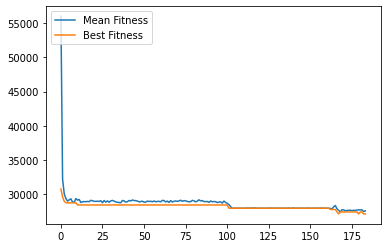

In [47]:
algo = r0733300()

algo.LAMBDA = 200  # Lambda represents the size of population
algo.MU = 200 # Mu represents the size of offsprings
algo.distanceMatrix = []  # distanceMatrix saves the cost between each two places
algo.K_TOURNAMENT_SIZE = 20  # this is the size of selection
algo.K_TOURNAMENT_SIZE_elimination = 20  # this is the size of selection
algo.alpha = 0.05  # alpha is the mutation rate
algo.iteration = 0  # iteration number
algo.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
algo.rank = 50
algo.rank_list = []
algo.s = 0.99999
algo.lsp_size = 1
algo.selectiveIni = 10

algo.selective_Diversify = 10
algo.alphaDiversity = 0.2
algo.K_TOURNAMENT_Size_Diversify = 5
algo.K_TOURNAMENT_SIZE_elimination_Diversify = 2
algo.LAMBDA_Diversify = 300

algo.optimizeElitism("tour29.csv", initializaMethod=1)



## Diversity Main Loop

In [48]:
class r0733300(r0733300):
    def optimizeDiverisify(self, filename, initializaMethod):
        # Read distance matrix from file.
        file = open(filename)
        distanceMatrix = np.loadtxt(file, delimiter=",")
        self.distanceMatrix = distanceMatrix
        file.close()
        if(initializaMethod == 0):
            population = self.initialize(self.distanceMatrix, self.LAMBDA)
        elif(initializaMethod == 1):
            population  = self.selectiveInializationBatch(self.selectiveIni, self.LAMBDA) 
        elif (initializaMethod ==2):
            population = self.greedyInializationBatch(self.distanceMatrix, self.LAMBDA)

        population += self.greedyInializationBatch(self.distanceMatrix, 10)

        meanFitnesses = []
        bestFitnesses = []

        meanObjective = np.mean(np.asarray(population)[:,1])
        bestObjective = np.min(population,axis=0)[1]
        initialDiversity = self.calculateDiveristy(population)

        meanFitnesses.append((meanObjective))
        bestFitnesses.append(bestObjective)

        print(" Inital Mean Objectives : " + str(meanObjective))
        print(" Inital Best Objectives : " + str(bestObjective))
        print(" diversity         : " + str(self.calculateDiveristy(population)))
        
        start = time.time()
        while (time.time()-start <= 300):
            self.iteration += 1

            newOffsprings = []


            
            for i in tqdm(range(self.MU)):
            # for i in range(self.MU):
                p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_SIZE)
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                # p1 = population[0]
                # p2 = population[1]
                while(True ): 
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)
                    # offspring1 = self.recominbation_crossover(p1,p2)
                    # offspring2 = self.recominbation_crossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alpha)
                    offspring2 = self.mutation_swap(offspring2, self.alpha)

                    offspring1 = self.mutation_insert(offspring1, self.alpha)
                    offspring2 = self.mutation_insert(offspring2, self.alpha)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                    
                    if(offspring1[1] < min(p1[1], p2[1]) or offspring2[1] <= min(p1[1], p2[1]) or random.random() < self.alpha):
                        break

            
            # for i in population:
            #     i = self.mutation_swap(i, self.alpha)
            #     i = self.mutation_insert(i, self.alpha)


            population += newOffsprings
            population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination)
        
            meanObjective = np.mean(np.asarray(population)[:,1])
            bestObjective = np.min(population,axis=0)[1]
            # bestSolution = population[np.argmin(objectives)]

            meanFitnesses.append((meanObjective))
            bestFitnesses.append(bestObjective)
            diversify = self.calculateDiveristy(population)
            
            print(self.iteration)
            print(" Mean Objectives : " + str(meanObjective))
            print(" Best Objectives : " + str(bestObjective))
            print(" diversity         : " + str(self.calculateDiveristy(population)))
            print("Time: " + str(time.time()-start))
            
            if(diversify >= 3* initialDiversity):
                print("  start diversifying")
            while(diversify >= 3 * initialDiversity):
                newPopulation = self.selectiveInializationBatch(self.selective_Diversify, self.LAMBDA_Diversify)
                newPopulation += self.initialize(self.distanceMatrix,self.LAMBDA_Diversify)
                # print("new Population" + str(self.calculateDiveristy(newPopulation)))
                
                # population += newPopulation
                newOffsprings = []
                
                for i in tqdm(range(self.MU)):
                    p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_Size_Diversify)
                    p2 = self.k_tournament_selection(newPopulation, self.K_TOURNAMENT_Size_Diversify)
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_swap(offspring2, self.alphaDiversity)

                    offspring1 = self.mutation_insert(offspring1, self.alphaDiversity)
                    offspring2 = self.mutation_insert(offspring2, self.alphaDiversity)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                
                population += newOffsprings
                # print("population size " + str(len(population)))
                population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination_Diversify)
                # print("population size " + str(len(population)))
                diversify = self.calculateDiveristy(population)
                print("New diverisity:    " + str(diversify))


        self.plotFitness(meanFitnesses, bestFitnesses)

### Diversify Process

In [50]:
algo = r0733300()

algo.LAMBDA = 200  # Lambda represents the size of population
algo.MU = 200 # Mu represents the size of offsprings
algo.distanceMatrix = []  # distanceMatrix saves the cost between each two places
algo.K_TOURNAMENT_SIZE = 20  # this is the size of selection
algo.K_TOURNAMENT_SIZE_elimination = 20  # this is the size of selection
algo.alpha = 0.05  # alpha is the mutation rate
algo.iteration = 0  # iteration number
algo.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
algo.rank = 50
algo.rank_list = []
algo.s = 0.99999
algo.lsp_size = 1
algo.selectiveIni = 20

algo.selective_Diversify = 29
algo.alphaDiversity = 0.2
algo.K_TOURNAMENT_Size_Diversify = 5
algo.K_TOURNAMENT_SIZE_elimination_Diversify = 2
algo.LAMBDA_Diversify = 300

algo.optimizeDiverisify("tour29.csv", initializaMethod=1)



100%|██████████| 10/10 [00:00<00:00, 1591.40it/s]


 Inital Mean Objectives : 94923.2102559987
 Inital Best Objectives : 30786.287230082078
 diversity         : 0.019494986780592014


100%|██████████| 200/200 [00:00<00:00, 213.20it/s]


1
 Mean Objectives : 33214.8417886739
 Best Objectives : 29187.38891784588
 diversity         : 0.1403015364349921
Time: 0.954620361328125
  start diversifying


100%|██████████| 300/300 [00:01<00:00, 272.98it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2942.70it/s]


New diverisity:    0.11591973305384357


100%|██████████| 300/300 [00:01<00:00, 281.43it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2940.53it/s]


New diverisity:    0.10523623517475661


100%|██████████| 300/300 [00:00<00:00, 318.45it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2810.29it/s]


New diverisity:    0.09572237232666968


100%|██████████| 300/300 [00:01<00:00, 263.03it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2889.14it/s]


New diverisity:    0.08829906417492213


100%|██████████| 300/300 [00:00<00:00, 316.37it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2925.64it/s]


New diverisity:    0.08056330909792965


100%|██████████| 300/300 [00:00<00:00, 319.52it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2905.98it/s]


New diverisity:    0.08300136258861199


100%|██████████| 300/300 [00:01<00:00, 260.42it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2847.61it/s]


New diverisity:    0.07993229501464974


100%|██████████| 300/300 [00:00<00:00, 302.45it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2897.44it/s]


New diverisity:    0.07673894096531048


100%|██████████| 300/300 [00:00<00:00, 311.92it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2893.86it/s]


New diverisity:    0.07622871948033204


100%|██████████| 300/300 [00:00<00:00, 319.28it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2842.60it/s]


New diverisity:    0.07241268585105805


100%|██████████| 300/300 [00:01<00:00, 291.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2820.54it/s]


New diverisity:    0.07105695348987122


100%|██████████| 300/300 [00:00<00:00, 315.70it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2835.76it/s]


New diverisity:    0.0716188288212047


100%|██████████| 300/300 [00:00<00:00, 303.12it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2840.86it/s]


New diverisity:    0.06853738377442188


100%|██████████| 300/300 [00:00<00:00, 313.40it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2796.15it/s]


New diverisity:    0.06750309306464058


100%|██████████| 300/300 [00:01<00:00, 264.52it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2862.93it/s]


New diverisity:    0.071019981663518


100%|██████████| 300/300 [00:01<00:00, 255.67it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2303.29it/s]


New diverisity:    0.06786177718686612


100%|██████████| 300/300 [00:01<00:00, 229.98it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2871.77it/s]


New diverisity:    0.06836481167856273


100%|██████████| 300/300 [00:01<00:00, 280.21it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2861.73it/s]


New diverisity:    0.06640914663609845


100%|██████████| 300/300 [00:00<00:00, 319.63it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2605.02it/s]


New diverisity:    0.061667601486533045


100%|██████████| 300/300 [00:01<00:00, 254.54it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2896.11it/s]


New diverisity:    0.0575394839958228


100%|██████████| 200/200 [00:00<00:00, 699.38it/s]


2
 Mean Objectives : 45213.088453984354
 Best Objectives : 38162.6496013273
 diversity         : 0.10612246161719015
Time: 24.060543537139893
  start diversifying


100%|██████████| 300/300 [00:01<00:00, 286.96it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2857.73it/s]


New diverisity:    0.08402847863216878


100%|██████████| 300/300 [00:00<00:00, 306.35it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2701.88it/s]


New diverisity:    0.08133000083071922


100%|██████████| 300/300 [00:01<00:00, 285.83it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2839.63it/s]


New diverisity:    0.07968251452340987


100%|██████████| 300/300 [00:00<00:00, 312.04it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2833.06it/s]


New diverisity:    0.08132317664518535


100%|██████████| 300/300 [00:00<00:00, 313.30it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2734.49it/s]


New diverisity:    0.07653175902043834


100%|██████████| 300/300 [00:01<00:00, 250.20it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2775.83it/s]


New diverisity:    0.07147635220307164


100%|██████████| 300/300 [00:00<00:00, 308.85it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2735.45it/s]


New diverisity:    0.06822232370040901


100%|██████████| 300/300 [00:00<00:00, 308.01it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2851.97it/s]


New diverisity:    0.06844004783357308


100%|██████████| 300/300 [00:00<00:00, 317.24it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2862.11it/s]


New diverisity:    0.07130999641063686


100%|██████████| 300/300 [00:01<00:00, 281.52it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2623.83it/s]


New diverisity:    0.07117998457003694


100%|██████████| 300/300 [00:00<00:00, 316.01it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2847.32it/s]


New diverisity:    0.06417001651927852


100%|██████████| 300/300 [00:01<00:00, 274.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2565.61it/s]


New diverisity:    0.06513956906176409


100%|██████████| 300/300 [00:01<00:00, 293.31it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2868.92it/s]


New diverisity:    0.06624963238154932


100%|██████████| 300/300 [00:00<00:00, 317.38it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2650.31it/s]


New diverisity:    0.06850843207554698


100%|██████████| 300/300 [00:01<00:00, 262.80it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2021.50it/s]


New diverisity:    0.06570847523494423


100%|██████████| 300/300 [00:01<00:00, 244.89it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2798.02it/s]


New diverisity:    0.06465932230277907


100%|██████████| 300/300 [00:01<00:00, 263.58it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2799.97it/s]


New diverisity:    0.06081041827844117


100%|██████████| 300/300 [00:01<00:00, 260.20it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1459.22it/s]


New diverisity:    0.058974300981821645


100%|██████████| 300/300 [00:00<00:00, 313.50it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2823.61it/s]


New diverisity:    0.056879155862919445


100%|██████████| 200/200 [00:00<00:00, 633.21it/s]


3
 Mean Objectives : 47445.11063791551
 Best Objectives : 39800.7514832806
 diversity         : 0.10893544591685986
Time: 46.09575533866882
  start diversifying


100%|██████████| 300/300 [00:01<00:00, 265.57it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2740.28it/s]


New diverisity:    0.0961015100672686


100%|██████████| 300/300 [00:00<00:00, 301.52it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2171.64it/s]


New diverisity:    0.08985449909943782


100%|██████████| 300/300 [00:01<00:00, 238.79it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2781.96it/s]


New diverisity:    0.08518347027901459


100%|██████████| 300/300 [00:01<00:00, 259.86it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2782.84it/s]


New diverisity:    0.08510222993221411


100%|██████████| 300/300 [00:00<00:00, 311.07it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2787.50it/s]


New diverisity:    0.07993491278862747


100%|██████████| 300/300 [00:01<00:00, 280.72it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2822.76it/s]


New diverisity:    0.07883763501890258


100%|██████████| 300/300 [00:01<00:00, 285.30it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2803.36it/s]


New diverisity:    0.08202051552986432


100%|██████████| 300/300 [00:01<00:00, 246.84it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2783.85it/s]


New diverisity:    0.07782245827432996


100%|██████████| 300/300 [00:01<00:00, 275.05it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1933.88it/s]


New diverisity:    0.07253421280738144


100%|██████████| 300/300 [00:01<00:00, 242.55it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2812.66it/s]


New diverisity:    0.07275465870248107


100%|██████████| 300/300 [00:00<00:00, 309.49it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2820.52it/s]


New diverisity:    0.06874971094322438


100%|██████████| 300/300 [00:01<00:00, 288.57it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2444.02it/s]


New diverisity:    0.06866457822297553


100%|██████████| 300/300 [00:01<00:00, 251.84it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2794.04it/s]


New diverisity:    0.06908444725891215


100%|██████████| 300/300 [00:01<00:00, 290.07it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2203.43it/s]


New diverisity:    0.0660436048370721


100%|██████████| 300/300 [00:01<00:00, 236.98it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2736.28it/s]


New diverisity:    0.06264513793478757


100%|██████████| 300/300 [00:01<00:00, 251.08it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2804.83it/s]


New diverisity:    0.06741789116941882


100%|██████████| 300/300 [00:01<00:00, 285.01it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2778.08it/s]


New diverisity:    0.06864832876359053


100%|██████████| 300/300 [00:01<00:00, 237.59it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2757.91it/s]


New diverisity:    0.06829465528271064


100%|██████████| 300/300 [00:01<00:00, 294.95it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2523.50it/s]


New diverisity:    0.06989430442421803


100%|██████████| 300/300 [00:01<00:00, 245.62it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2825.92it/s]


New diverisity:    0.06967700785635057


100%|██████████| 300/300 [00:00<00:00, 310.77it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2570.94it/s]


New diverisity:    0.0670172150916245


100%|██████████| 300/300 [00:01<00:00, 244.61it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2727.58it/s]


New diverisity:    0.0691420351080509


100%|██████████| 300/300 [00:00<00:00, 301.24it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2784.42it/s]


New diverisity:    0.06930462135686821


100%|██████████| 300/300 [00:01<00:00, 248.84it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2556.96it/s]


New diverisity:    0.06549757317555703


100%|██████████| 300/300 [00:01<00:00, 247.60it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2697.64it/s]


New diverisity:    0.06502119904067025


100%|██████████| 300/300 [00:01<00:00, 290.00it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2639.06it/s]


New diverisity:    0.05995935865620205


100%|██████████| 300/300 [00:01<00:00, 244.34it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 1792.80it/s]


New diverisity:    0.06320714850686868


100%|██████████| 300/300 [00:01<00:00, 268.84it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2564.14it/s]


New diverisity:    0.06441893700785949


100%|██████████| 300/300 [00:01<00:00, 263.73it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2826.64it/s]


New diverisity:    0.060979465513610706


100%|██████████| 300/300 [00:01<00:00, 293.17it/s]


<module 'random' from '/usr/lib/python3.8/random.py'>


100%|██████████| 200/200 [00:00<00:00, 2511.67it/s]


New diverisity:    0.06118803947524378


  2%|▏         | 5/300 [00:00<00:01, 259.37it/s]


KeyboardInterrupt: 

## Original

### Oringal Main Loop

In [25]:
class r0733300(r0733300):
    def optimize(self, filename, initializaMethod):
        # Read distance matrix from file.
        file = open(filename)
        distanceMatrix = np.loadtxt(file, delimiter=",")
        self.distanceMatrix = distanceMatrix
        file.close()
        if(initializaMethod == 0):
            population = self.initialize(self.distanceMatrix, self.LAMBDA)
        elif(initializaMethod == 1):
            population  = self.selectiveInializationBatch(self.selectiveIni, self.LAMBDA) 
        elif (initializaMethod ==2):
            population = self.greedyInializationBatch(distanceMatrix, self.LAMBDA)
        
        # population += self.greedyInializationBatch(distanceMatrix)
        # elif (initializaMethod ==3) :
            # print(np.shape(population))

        # objectives = []

        # for individual in population:
        #     objectives.append(self.calculate_distance(individual))

        meanFitnesses = []
        bestFitnesses = []

        # meanObjective = np.mean(population,axis=0)[1]
        meanObjective = np.mean(np.asarray(population)[:,1])
        bestObjective = np.min(population,axis=0)[1]
        initialDiversity = self.calculateDiveristy(population)

        meanFitnesses.append((meanObjective))
        bestFitnesses.append(bestObjective)

        print(" Inital Mean Objectives : " + str(meanObjective))
        print(" Inital Best Objectives : " + str(bestObjective))
        print(" diversity         : " + str(initialDiversity))
        # print(" Initial Best Solution : " + str(bestSolution))
        
        start = time.time()
        while (time.time()-start <= 300):
            self.iteration += 1
            newOffsprings = []
            for i in tqdm(range(self.MU)):
                p1 = self.k_tournament_selection(population,self.K_TOURNAMENT_SIZE)
                p2 = self.k_tournament_selection(population, self.K_TOURNAMENT_SIZE)
                while(True ): 
                    offspring1 = self.orderCrossover(p1, p2)
                    offspring2 = self.orderCrossover(p2, p1)

                    offspring1 = self.mutation_swap(offspring1, self.alpha)
                    offspring2 = self.mutation_swap(offspring2, self.alpha)

                    offspring1 = self.mutation_insert(offspring1, self.alpha)
                    offspring2 = self.mutation_insert(offspring2, self.alpha)

                    newOffsprings.append(offspring1)
                    newOffsprings.append(offspring2)
                    
                    if(offspring1[1] < min(p1[1], p2[1]) or offspring2[1] <= min(p1[1], p2[1]) or random.random() < self.alpha):
                        break

            
            for i in population:
                i = self.mutation_swap(i, self.alpha)
                i = self.mutation_insert(i, self.alpha)


            population += newOffsprings
            population= self.eliminate_k_turnament(population,self.K_TOURNAMENT_SIZE_elimination)
        
            meanObjective = np.mean(np.asarray(population)[:,1])
            bestObjective = np.min(population,axis=0)[1]
            diversity = self.calculateDiveristy(population)
            # bestSolution = population[np.argmin(objectives)]

            meanFitnesses.append((meanObjective))
            bestFitnesses.append(bestObjective)
            
            
            print(self.iteration)
            print(" Mean Objectives : " + str(meanObjective))
            print(" Best Objectives : " + str(bestObjective))
            print(" diversity         : " + str(diversity))
            print("Time: " + str(time.time()-start))



        self.plotFitness(meanObjective, bestObjective)

In [122]:
# algo = r0733300();
# file = open("tour500(1).csv")
# distanceMatrix = np.loadtxt(file, delimiter=",")
# algo.distanceMatrix = distanceMatrix
# # pop = algo.selectiveInializationBatch(5)
# pop2 = algo.initialize(distanceMatrix)
# algo.orderCrossover(pop2[0], pop2[1])

### Original Process

In [23]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)        

In [47]:
algo = r0733300()

algo.LAMBDA = 200  # Lambda represents the size of population
algo.MU = 200 # Mu represents the size of offsprings
algo.distanceMatrix = []  # distanceMatrix saves the cost between each two places
algo.K_TOURNAMENT_SIZE = 20  # this is the size of selection
algo.K_TOURNAMENT_SIZE_elimination = 20  # this is the size of selection
algo.alpha = 0.05  # alpha is the mutation rate
algo.iteration = 0  # iteration number
algo.converge = 0.018  # difference between mean and best evalue. If (mean- best)/best < converge, it converges.
algo.rank = 50
algo.rank_list = []
algo.s = 0.99999
algo.lsp_size = 1
algo.selectiveIni = 10

algo.optimize("tour500(1).csv", initializaMethod=1)

100%|██████████| 200/200 [00:07<00:00, 25.32it/s]


 Inital Mean Objectives : inf
 Inital Best Objectives : 263981.2789999999
 diversity         : 0.01379848575135023


100%|██████████| 200/200 [00:05<00:00, 33.56it/s]


1
 Mean Objectives : 1235266835.2118123
 Best Objectives : 243596.3169999999
 diversity         : 0.03490295157317172
Time: 6.279402017593384


100%|██████████| 200/200 [00:21<00:00,  9.34it/s]


2
 Mean Objectives : 249638.20473499986
 Best Objectives : 238056.1519999999
 diversity         : 0.041785978857320036
Time: 27.99173402786255


100%|██████████| 200/200 [00:16<00:00, 12.20it/s]


3
 Mean Objectives : 240628.51277499995
 Best Objectives : 233627.96899999992
 diversity         : 0.04249565917543176
Time: 44.66198921203613


100%|██████████| 200/200 [00:23<00:00,  8.43it/s]


4
 Mean Objectives : 235297.1174
 Best Objectives : 227736.28199999977
 diversity         : 0.04360059919961916
Time: 68.7079610824585


100%|██████████| 200/200 [00:16<00:00, 11.89it/s]


5
 Mean Objectives : 230832.8511799998
 Best Objectives : 224494.1219999999
 diversity         : 0.04359239821041055
Time: 85.81514596939087


100%|██████████| 200/200 [00:20<00:00,  9.83it/s]


6
 Mean Objectives : 227000.36192999984
 Best Objectives : 222654.40199999994
 diversity         : 0.0436816673094646
Time: 106.45884013175964


100%|██████████| 200/200 [00:19<00:00, 10.25it/s]


7
 Mean Objectives : 224229.47229999982
 Best Objectives : 215964.92199999993
 diversity         : 0.04394610327283761
Time: 126.25204420089722


100%|██████████| 200/200 [00:21<00:00,  9.45it/s]


8
 Mean Objectives : 219302.48535499992
 Best Objectives : 214269.44199999992
 diversity         : 0.04409008793298677
Time: 147.69816613197327


100%|██████████| 200/200 [00:21<00:00,  9.40it/s]


9
 Mean Objectives : 215965.18912
 Best Objectives : 212784.40699999992
 diversity         : 0.044206572137853416
Time: 169.28549027442932


100%|██████████| 200/200 [00:18<00:00, 10.61it/s]


10
 Mean Objectives : 214244.84426499993
 Best Objectives : 210429.4719999999
 diversity         : 0.044173072528785294
Time: 188.4154770374298


100%|██████████| 200/200 [00:20<00:00,  9.55it/s]


11
 Mean Objectives : 212153.7103400001
 Best Objectives : 208073.36200000002
 diversity         : 0.044215463684024105
Time: 209.65127825737


100%|██████████| 200/200 [00:21<00:00,  9.23it/s]


12
 Mean Objectives : 209590.53237000006
 Best Objectives : 205796.592
 diversity         : 0.044231569843321085
Time: 231.6218192577362


100%|██████████| 200/200 [00:28<00:00,  7.10it/s]


13
 Mean Objectives : 207663.03921999998
 Best Objectives : 205506.602
 diversity         : 0.04429758542918923
Time: 260.06076312065125


100%|██████████| 200/200 [00:28<00:00,  7.07it/s]


14
 Mean Objectives : 207180.74673000007
 Best Objectives : 205096.066
 diversity         : 0.04436492963785442
Time: 288.6556873321533


100%|██████████| 200/200 [00:25<00:00,  7.81it/s]


15
 Mean Objectives : 206542.24215000003
 Best Objectives : 204806.076
 diversity         : 0.044311587144067244
Time: 314.54817628860474


TypeError: object of type 'numpy.float64' has no len()

<Figure size 432x288 with 0 Axes>

## Greedy Search

In [804]:
# Python3 program for the above approach

from typing import DefaultDict


INT_MAX = float("inf")	


# Function to find the minimum
# cost path for all the paths
def findMinRoute(tsp,k):
	length = len(tsp)
	# sum = 0
	counter = 0
	j = 0
	i = random.randrange(length)
	# i = random.randrange(length)
	min = INT_MAX
	min_city = 0
	visitedRouteList = DefaultDict(int)

	# Starting from the 0th indexed
	# city i.e., the first city
	visitedRouteList[i] = 1
	route = [0] * len(tsp)
	route[0] = i
	counter += 1

	# Traverse the adjacency
	# matrix tsp[][]
	# while i < len(tsp) and j < len(tsp[i]):
	while(counter <= length):

		# Corner of the Matrix
		if counter >= len(tsp[i])  :
			break

		# If this path is unvisited then
		# and if the cost is less then
		# update the cost
		if j != i and (visitedRouteList[j] == 0):
			# if tsp[i][j] < min and tsp[i][j] != float("inf"):
			if tsp[i][j] <= min:	
				# print(min)
				min = tsp[i][j]
				min_city = j
				# route[counter] = j

		j += 1

		# Check all paths from the
		# ith indexed city
		if j == len(tsp[i]):
			# sum += min
			min = INT_MAX
			visitedRouteList[min_city] = 1
			route[counter] = min_city
			j = 0
			i = route[counter]
			counter += 1
			min_city=0

	# Update the ending city in array
	# from city which was last visited
	# i = route[counter - 1]

	# for j in range(len(tsp)):

	# 	if (i != j) and tsp[i][j] < min:
	# 		min = tsp[i][j]
	# 		route[counter] = j

	# sum += tsp[route[0]][route[counter-1]]
	sum =0
	for i in range(len(route)-1):
		sum += tsp[route[i]][route[i+1]]
	sum += tsp[route[len(route)-1]][route[0]]

	# Started from the node where
	# we finished as well.
	print("Minimum Cost is :", sum)
	print(route)
	print(np.sort(route))


# Driver Code
file = open("tour100(1).csv")
tsp = np.loadtxt(file, delimiter=",")
findMinRoute(tsp,len(tsp))


Minimum Cost is : inf
[9, 4, 18, 48, 72, 42, 71, 54, 6, 97, 40, 34, 64, 24, 80, 91, 2, 53, 87, 13, 50, 3, 68, 16, 62, 63, 83, 96, 21, 26, 98, 39, 79, 0, 81, 29, 19, 22, 95, 37, 51, 92, 43, 59, 78, 93, 89, 41, 75, 90, 7, 76, 23, 35, 88, 45, 44, 57, 99, 65, 14, 5, 61, 74, 1, 70, 30, 60, 55, 85, 12, 94, 17, 69, 73, 58, 38, 10, 15, 28, 56, 82, 36, 20, 66, 31, 46, 33, 25, 52, 8, 32, 49, 11, 27, 86, 67, 77, 47, 84]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
file = open("tour29(1).csv")
tsp = np.loadtxt(file, delimiter=",")
route = [2, 24, 15, 16, 9, 5, 8, 4, 0, 7, 27, 19, 3, 13, 14, 18, 12, 1, 23, 6, 10, 25, 28, 11, 20, 17, 21, 22, 26]
cost = 0

for i in range(0,len(route)-1):
    cost += tsp[route[i]][route[i+1]]

cost +=tsp[route[0]][route[-1]]
print(cost)

In [ ]:
file = open("tour1000(1).csv")
cost = 0
distanceMatrix = np.loadtxt(file, delimiter=",")
algo = r0733300()
random = algo.selectiveInialization(distanceMatrix, 20)
for i in range(len(random)-1):
    cost += distanceMatrix[random[i]][random[i+1]]
cost += distanceMatrix[random[0]][random[-1]]
print(cost)